# **<span style='color:#E1B12D'><i>LOAD DATA </i></span>**

In [ ]:
# Download data dari Google Drive
!gdown --id 1MdpJufJC_J5t3b4g53mz2HbTvk5hW-0X

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MdpJufJC_J5t3b4g53mz2HbTvk5hW-0X
To: /content/df2_processed.csv
100% 9.27M/9.27M [00:00<00:00, 169MB/s]


In [ ]:
# Mengimpor pandas dan memuat dataset
import pandas as pd

# Mengganti nama file jika diperlukan
df = pd.read_csv('df2_processed.csv')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,default_loan_interaction,housing_loan_interaction,default_housing_loan_interaction,duration_prev_interaction,contact_quarter,emp.var.rate_bin,cons.price.idx_bin,cons.conf.idx_bin,euribor3m_bin,nr.employed_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,no_no,no_no,no_no_no,261.0,2,0 - 1.1,93 - 94.5,-40 - (-30),4.5 - 5,5100 - 5200
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,no_no,yes_no,no_yes_no,226.0,2,0 - 1.1,93 - 94.5,-40 - (-30),4.5 - 5,5100 - 5200
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,no_no,no_no,no_no_no,151.0,2,0 - 1.1,93 - 94.5,-40 - (-30),4.5 - 5,5100 - 5200
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,no_yes,no_yes,no_no_yes,307.0,2,0 - 1.1,93 - 94.5,-40 - (-30),4.5 - 5,5100 - 5200
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,no_no,no_no,no_no_no,139.0,2,0 - 1.1,93 - 94.5,-40 - (-30),4.5 - 5,5100 - 5200


# **<span style='color:#E1B12D'><i> BUSINESS INSIGHT </i></span>**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                30478 non-null  int64  
 1   job                                30478 non-null  object 
 2   marital                            30478 non-null  object 
 3   education                          30478 non-null  object 
 4   default                            30478 non-null  object 
 5   housing                            30478 non-null  object 
 6   loan                               30478 non-null  object 
 7   contact                            30478 non-null  object 
 8   month                              30478 non-null  object 
 9   day_of_week                        30478 non-null  object 
 10  duration                           30478 non-null  int64  
 11  campaign                           30478 non-null  int

## **Bagaimana Umur Mempengaruhi Kecenderungan Pelanggan dalam Melakukan Deposit?**

In [ ]:
# Menghitung jumlah setiap bin umur terhadap target variabel
pivot_table = pd.pivot_table(
    df,
    values='age',
    index='age_bin',
    columns='y',
    aggfunc='count',
    fill_value=0
)

# Menambahkan kolom 'Total' untuk jumlah setiap bin umur
pivot_table['Total'] = pivot_table['no'] + pivot_table['yes']

# Menghitung persentase 'yes' dan 'no' terhadap total
pivot_table['no_percentage'] = (pivot_table['no'] / pivot_table['Total']) * 100
pivot_table['yes_percentage'] = (pivot_table['yes'] / pivot_table['Total']) * 100

# Menampilkan pivot table dengan persentase
pivot_table[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']]


y,no,yes,Total,no_percentage,yes_percentage
age_bin,,,,,
Dewasa,12094,1494,13588,89.005004,10.994996
Dewasa Tua,6374,656,7030,90.668563,9.331437
Lansia,508,373,881,57.661748,42.338252
Muda,3937,793,4730,83.234672,16.765328
Tua,3705,542,4247,87.238050,12.761950


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Membuat subplots: histogram untuk jumlah dan pie chart untuk persentase
fig = make_subplots(
    rows=2, cols=5,
    specs=[[{'type':'xy'}]*5, [{'type':'pie'}]*5],
    subplot_titles=[
        "Dewasa", "Dewasa Tua", "Lansia", "Muda", "Tua",
        "Dewasa - Persentase", "Dewasa Tua - Persentase", "Lansia - Persentase", "Muda - Persentase", "Tua - Persentase"
    ]
)

# Menambahkan histogram untuk jumlah
age_bins = ['Dewasa', 'Dewasa Tua', 'Lansia', 'Muda', 'Tua']
for i, age_bin in enumerate(age_bins):
    fig.add_trace(go.Bar(
        x=['No', 'Yes'],
        y=[pivot_table.loc[age_bin, 'no'], pivot_table.loc[age_bin, 'yes']],
        name=f"{age_bin} - Jumlah"
    ), row=1, col=i+1)

# Menambahkan pie chart untuk persentase
for i, age_bin in enumerate(age_bins):
    fig.add_trace(go.Pie(
        labels=['No', 'Yes'],
        values=[pivot_table.loc[age_bin, 'no_percentage'], pivot_table.loc[age_bin, 'yes_percentage']],
        marker=dict(colors=['#800000', '#006400']),  # Warna maroon untuk 'No' dan hijau tua untuk 'Yes'
        name=f"{age_bin} - Persentase"
    ), row=2, col=i+1)

# Menampilkan plot
fig.update_layout(title_text="Distribusi Jumlah dan Persentase Yes/No Berdasarkan Umur", height=800)
fig.show()


**Penjelasan**

Berdasarkan data yang ada, kita melihat bahwa secara jumlah, kategori Dewasa (usia 30-40 tahun) memiliki jumlah pelanggan terbanyak yang menjawab "yes" dan "no". Namun, jika kita menganalisis berdasarkan persentase dari total jumlah dalam setiap kategori umur, terlihat bahwa kategori Lansia (usia >=60 tahun) memiliki persentase yang lebih tinggi dalam memilih "yes" dibandingkan dengan kategori umur lainnya.

Ini menunjukkan bahwa meskipun jumlah absolutnya lebih kecil, proporsi pelanggan Lansia yang tertarik dengan penawaran atau produk jauh lebih signifikan dibandingkan dengan kelompok umur lainnya. Rentang usia yang di kelompokkan meliputi:

- **<30**: Usia di bawah 30 tahun (Muda)
- **30-40**: Usia antara 30 hingga 39 tahun (Dewasa)
- **40-50**: Usia antara 40 hingga 49 tahun (Dewasa Tua)
- **50-60**: Usia antara 50 hingga 59 tahun (Tua)
- **>=60**: Usia 60 tahun ke atas (Lansia)

**Analisis**

Selama krisis ekonomi Portugal 2008-2014, dampaknya berbeda pada kelompok usia. Kelompok Lansia (usia >=60 tahun) menunjukkan persentase ketertarikan yang lebih tinggi terhadap penawaran meskipun jumlahnya lebih kecil. Ini mungkin disebabkan oleh:

1. **Keamanan Finansial**: Lansia sering memiliki pensiun atau tabungan yang memadai, sehingga mereka lebih siap berinvestasi dalam produk yang meningkatkan kualitas hidup.
2. **Prioritas Konsumsi**: Selama krisis, Lansia mungkin lebih fokus pada produk yang menawarkan kenyamanan dan keamanan tambahan.

Sebaliknya, kelompok usia yang lebih muda, seperti "Muda" (usia di bawah 30 tahun), mungkin lebih terpengaruh oleh ketidakpastian ekonomi dan kurang tertarik pada penawaran tambahan.


### **Bagaimana Pekerjaan Mempengaruhi Kecenderungan Pelanggan dalam Melakukan Deposit?**

In [ ]:
import pandas as pd

# Menghitung jumlah setiap job terhadap target variabel
pivot_job_y = pd.pivot_table(
    df,
    index='job',
    columns='y',
    aggfunc='size',  # Menghitung jumlah baris untuk setiap kombinasi job dan y
    fill_value=0
)

# Menambahkan kolom 'Total' untuk jumlah setiap job
pivot_job_y['Total'] = pivot_job_y['no'] + pivot_job_y['yes']

# Menghitung persentase 'no' dan 'yes' terhadap total
pivot_job_y['no_percentage'] = (pivot_job_y['no'] / pivot_job_y['Total']) * 100
pivot_job_y['yes_percentage'] = (pivot_job_y['yes'] / pivot_job_y['Total']) * 100

# Menampilkan pivot table dengan persentase
pivot_job_y[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']]


y,no,yes,Total,no_percentage,yes_percentage
job,,,,,
admin.,7519,1215,8734,86.088848,13.911152
blue-collar,5222,452,5674,92.033839,7.966161
entrepreneur,988,101,1089,90.725436,9.274564
housemaid,603,87,690,87.391304,12.608696
management,2025,286,2311,87.624405,12.375595
retired,858,357,1215,70.617284,29.382716
self-employed,960,132,1092,87.912088,12.087912
services,2598,258,2856,90.966387,9.033613
student,407,203,610,66.721311,33.278689


In [ ]:
import plotly.graph_objs as go

# Data
jobs = pivot_job_y.index
no_counts = pivot_job_y['no']
yes_counts = pivot_job_y['yes']
total_counts = no_counts + yes_counts
no_percentages = pivot_job_y['no_percentage'].round(1)  # Membulatkan ke 1 angka di belakang koma
yes_percentages = pivot_job_y['yes_percentage'].round(1)  # Membulatkan ke 1 angka di belakang koma

# Mengurutkan data berdasarkan jumlah total
sorted_indices = total_counts.sort_values().index
sorted_no_counts = no_counts[sorted_indices]
sorted_yes_counts = yes_counts[sorted_indices]
sorted_no_percentages = no_percentages[sorted_indices]
sorted_yes_percentages = yes_percentages[sorted_indices]

# Membuat histogram untuk jumlah
fig = go.Figure()

# Menambahkan histogram untuk jumlah 'No'
fig.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_no_counts,
    name='No (Jumlah)',
    orientation='h',
    marker_color='#8B0000',  # Warna merah gelap
    text=sorted_no_counts,
    textposition='inside'
))

# Menambahkan histogram untuk jumlah 'Yes'
fig.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_yes_counts,
    name='Yes (Jumlah)',
    orientation='h',
    marker_color='#006400',  # Warna hijau tua
    text=sorted_yes_counts,
    textposition='inside'
))

# Mengatur layout untuk jumlah
fig.update_layout(
    title='Jumlah Pelanggan Berdasarkan Pekerjaan dan Status Respon',
    xaxis_title='Jumlah',
    yaxis_title='Pekerjaan',
    barmode='stack',
    xaxis=dict(
        tickvals=[0, max(total_counts)],
        ticktext=[f'0', f'{max(total_counts)}']
    ),
    yaxis=dict(
        tickvals=sorted_indices,
        ticktext=[f"{job}" for job in sorted_indices]
    )
)

# Menampilkan plot
fig.show()


In [ ]:
import plotly.graph_objs as go

# Data
jobs = pivot_job_y.index
no_counts = pivot_job_y['no']
yes_counts = pivot_job_y['yes']
total_counts = no_counts + yes_counts
no_percentages = pivot_job_y['no_percentage'].round(1)  # Membulatkan ke 1 angka di belakang koma
yes_percentages = pivot_job_y['yes_percentage'].round(1)  # Membulatkan ke 1 angka di belakang koma

# Mengurutkan data berdasarkan persentase 'Yes' dari terbesar ke terkecil
sorted_indices = yes_percentages.sort_values(ascending=False).index
sorted_no_counts = no_counts[sorted_indices]
sorted_yes_counts = yes_counts[sorted_indices]
sorted_no_percentages = no_percentages[sorted_indices]
sorted_yes_percentages = yes_percentages[sorted_indices]

# Membuat histogram untuk persentase
fig2 = go.Figure()

# Menambahkan histogram untuk persentase 'No'
fig2.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_no_percentages,
    name='No (Persentase)',
    orientation='h',
    marker_color='#003366',  # Warna biru tua
    text=sorted_no_percentages,
    textposition='inside'
))

# Menambahkan histogram untuk persentase 'Yes'
fig2.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_yes_percentages,
    name='Yes (Persentase)',
    orientation='h',
    marker_color='#FFCC00',  # Warna kuning mustard
    text=sorted_yes_percentages,
    textposition='inside'
))

# Mengatur layout untuk persentase
fig2.update_layout(
    title='Persentase Pelanggan Berdasarkan Pekerjaan dan Status Respon',
    xaxis_title='Persentase (%)',
    yaxis_title='Pekerjaan',
    barmode='stack',
    xaxis=dict(
        tickvals=[0, 100],
        ticktext=[f'0%', f'100%']
    ),
    yaxis=dict(
        title='Pekerjaan',
        tickvals=sorted_indices,
        ticktext=[f"{job}" for job in sorted_indices],
        autorange='reversed'  # Membalikkan urutan y-axis agar yang tertinggi di atas
    )
)

# Menampilkan plot
fig2.show()


**Penjelasan**

1. **Pengamatan Umum**:
   - **Top 3 Berdasarkan Jumlah**: Admin, Blue-collar, dan Entrepreneur memang memiliki jumlah terbesar dalam dataset.
   - **Top 3 Berdasarkan Persentase**: Student, Retired, dan Unemployed memiliki persentase terbesar dari total yang melakukan deposit. Ini menunjukkan bahwa meskipun jumlahnya lebih kecil, proporsi mereka yang melakukan deposit lebih tinggi dibandingkan dengan kategori pekerjaan lainnya.
   - **Retired**: Orang yang sudah pensiun menunjukkan persentase deposit yang tinggi (29.38%).
 - **Kemampuan Menabung**: Persentase deposit yang lebih tinggi pada kategori tertentu seperti Student, Retired, dan Unemployed mungkin menunjukkan bahwa individu dalam kategori ini lebih cenderung menyisihkan uang untuk keperluan masa depan atau memiliki sumber pendapatan yang lebih stabil (seperti pensiun) dibandingkan dengan kategori pekerjaan lainnya.
 - **Kondisi Ekonomi dan Pekerjaan**: Bagi kategori pekerjaan seperti Blue-collar dan Services, rendahnya persentase deposit bisa terkait dengan penghasilan yang lebih rendah dan biaya hidup yang tinggi, yang membuat mereka kurang mampu untuk menyisihkan uang.


### **Bagaimana Status Pernikahan Mempengaruhi Kecenderungan Pelanggan dalam Melakukan Deposit?**

In [ ]:
import pandas as pd

# Menghitung jumlah setiap marital terhadap target variabel
pivot_marital_y = pd.pivot_table(
    df,
    index='marital',
    columns='y',
    aggfunc='size',  # Menghitung jumlah baris untuk setiap kombinasi marital dan y
    fill_value=0
)

# Menambahkan kolom 'Total' untuk jumlah setiap marital
pivot_marital_y['Total'] = pivot_marital_y['no'] + pivot_marital_y['yes']

# Menghitung persentase 'no' dan 'yes' terhadap total
pivot_marital_y['no_percentage'] = (pivot_marital_y['no'] / pivot_marital_y['Total']) * 100
pivot_marital_y['yes_percentage'] = (pivot_marital_y['yes'] / pivot_marital_y['Total']) * 100

# Menampilkan pivot table dengan persentase
pivot_marital_y[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']]


y,no,yes,Total,no_percentage,yes_percentage
marital,,,,,
divorced,3142,410,3552,88.457207,11.542793
married,15432,2055,17487,88.248413,11.751587
single,8046,1393,9439,85.242081,14.757919


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Data
marital_status = pivot_marital_y.index
no_counts = pivot_marital_y['no']
yes_counts = pivot_marital_y['yes']
total_counts = no_counts + yes_counts
no_percentages = pivot_marital_y['no_percentage'].round(1)
yes_percentages = pivot_marital_y['yes_percentage'].round(1)

# Mengurutkan data berdasarkan jumlah total
sorted_indices = total_counts.sort_values().index
sorted_no_counts = no_counts[sorted_indices]
sorted_yes_counts = yes_counts[sorted_indices]
sorted_no_percentages = no_percentages[sorted_indices]
sorted_yes_percentages = yes_percentages[sorted_indices]

# Membuat subplots dengan 4 plot: bar chart di atas dan 3 pie chart di bawah
fig = make_subplots(
    rows=2, cols=3,
    row_heights=[0.5, 0.5],  # Mengatur tinggi baris agar seimbang
    specs=[[{"type": "bar", "colspan": 3}, None, None],
           [{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]],
    subplot_titles=[
        "Jumlah Pelanggan Berdasarkan Status Marital dan Status Respon",
        f"{sorted_indices[0].capitalize()} ",
        f"{sorted_indices[1].capitalize()} ",
        f"{sorted_indices[2].capitalize()} "
    ],
    vertical_spacing=0.3  # Menambah jarak antara bar chart dan pie chart
)

# Bar Chart (Jumlah)
fig.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_no_counts,
    name='No (Jumlah)',
    orientation='h',
    marker_color='#FF5733',  # Warna oranye
    text=sorted_no_counts,
    textposition='inside'
), row=1, col=1)

fig.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_yes_counts,
    name='Yes (Jumlah)',
    orientation='h',
    marker_color='#33FFBD',  # Warna hijau muda
    text=sorted_yes_counts,
    textposition='inside'
), row=1, col=1)

# Pie Charts untuk setiap status marital dengan warna biru dan hijau tua
colors = ['#1f77b4', '#2ca02c']  # Biru dan hijau

for i, status in enumerate(sorted_indices[:3]):
    fig.add_trace(go.Pie(
        labels=['No', 'Yes'],
        values=[sorted_no_counts[status], sorted_yes_counts[status]],
        marker_colors=colors,
        textinfo='label+percent',
        hoverinfo='label+value',
        hole=.4
    ), row=2, col=i + 1)

# Mengatur layout untuk bar chart dan pie chart
fig.update_layout(
    barmode='stack',
    xaxis_title='Jumlah',
    yaxis_title='Status Marital',
    showlegend=False,
    font=dict(size=10),  # Mengatur ukuran font lebih kecil
    title_font=dict(size=12),  # Ukuran font judul pie chart lebih kecil
    margin=dict(t=60),  # Tambahkan margin untuk judul bar chart
)

# Mengatur posisi y dari anotasi untuk memberikan jarak
for annotation in fig['layout']['annotations']:
    annotation['yshift'] = 20  # Tambahkan jarak antara judul dan pie chart

# Menampilkan plot
fig.show()


**Analisis Berdasarkan Persentase Deposit**
- **Single**:Persentase depositnya (14.76%) adalah yang tertinggi dibandingkan dengan status marital lainnya. Hal ini menunjukkan bahwa individu yang belum menikah mungkin lebih cenderung untuk menyisihkan uang mereka sebagai deposit, karena lebih besar dari status tanggungan seperti istri dan anak.
- **Married**: Memiliki persentase deposit yang sedikit lebih rendah (11.75%) dibandingkan dengan single tetapi lebih tinggi daripada divorced. Ini mungkin mencerminkan adanya tanggung jawab finansial yang lebih besar, seperti keluarga dan anak-anak, yang dapat mempengaruhi kemampuan untuk melakukan deposit.
- **Divorced**: Persentase deposit (11.54%) adalah yang terendah di antara ketiga status marital. Ini mungkin disebabkan oleh perubahan dalam situasi finansial setelah perceraian, yang dapat mempengaruhi kemampuan untuk melakukan deposit.


### **Bagaimana Pendidikan Mempengaruhi Kecenderungan Pelanggan dalam Melakukan Deposit?**

In [ ]:
import pandas as pd

# Menghitung jumlah setiap education terhadap target variabel
pivot_education_y = pd.pivot_table(
    df,
    index='education',
    columns='y',
    aggfunc='size',  # Menghitung jumlah baris untuk setiap kombinasi education dan y
    fill_value=0
)

# Menambahkan kolom 'Total' untuk jumlah setiap education
pivot_education_y['Total'] = pivot_education_y['no'] + pivot_education_y['yes']

# Menghitung persentase 'no' dan 'yes' terhadap total
pivot_education_y['no_percentage'] = (pivot_education_y['no'] / pivot_education_y['Total']) * 100
pivot_education_y['yes_percentage'] = (pivot_education_y['yes'] / pivot_education_y['Total']) * 100

# Menampilkan pivot table dengan persentase
pivot_education_y[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']]


y,no,yes,Total,no_percentage,yes_percentage
education,,,,,
basic.4y,2054,326,2380,86.302521,13.697479
basic.6y,1252,136,1388,90.201729,9.798271
basic.9y,3896,380,4276,91.113190,8.886810
high.school,6763,934,7697,87.865402,12.134598
illiterate,8,3,11,72.727273,27.272727
professional.course,3780,538,4318,87.540528,12.459472
university.degree,8867,1541,10408,85.194081,14.805919


**Penjelasan**


- **University Degree** menunjukkan proporsi `yes` tertinggi dengan memiliki jumlah total yang terbesar juga.
- **Basic 4 Years** adalah kategori pendidikan dasar dengan persentase `yes` yang cukup tinggi, menunjukkan bahwa meskipun pendidikan dasarnya lebih rendah, proporsi `yes` masih signifikan.
- **Illiterate** menunjukkan proporsi `yes` tertinggi tetapi dengan jumlah total yang sangat kecil, sehingga mungkin tidak mewakili populasi secara luas.

Ini akan dilakuakn detail lebih pada kolom selanjutnya.

### **Bagaimana Pekerjaan dan Status Pernikahan Mempengaruhi Kecenderungan Pelanggan dalam Melakukan Deposit?**

In [ ]:
import pandas as pd

# Menghitung jumlah setiap kombinasi job-marital terhadap target variabel
pivot_job_marital = pd.pivot_table(
    df,
    index='job_marital_interaction',
    columns='y',
    aggfunc='size',  # Menghitung jumlah baris untuk setiap kombinasi job-marital dan y
    fill_value=0
)

# Menambahkan kolom 'Total' untuk jumlah setiap kombinasi job-marital
pivot_job_marital['Total'] = pivot_job_marital['no'] + pivot_job_marital['yes']

# Menghitung persentase 'no' dan 'yes' terhadap total
pivot_job_marital['no_percentage'] = (pivot_job_marital['no'] / pivot_job_marital['Total']) * 100
pivot_job_marital['yes_percentage'] = (pivot_job_marital['yes'] / pivot_job_marital['Total']) * 100

# Mengurutkan pivot_job_marital berdasarkan yes_percentage dari yang terbesar
pivot_job_marital_sorted = pivot_job_marital.sort_values(by='yes_percentage', ascending=False)

# Menampilkan pivot table job-marital interaction yang telah diurutkan
display(pivot_job_marital_sorted[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']])


y,no,yes,Total,no_percentage,yes_percentage
job_marital_interaction,,,,,
student_divorced,3,3,6,50.000000,50.000000
student_single,379,192,571,66.374781,33.625219
retired_married,610,267,877,69.555302,30.444698
retired_divorced,193,80,273,70.695971,29.304029
student_married,25,8,33,75.757576,24.242424
unemployed_single,177,44,221,80.090498,19.909502
housemaid_single,71,15,86,82.558140,17.441860
unemployed_married,351,72,423,82.978723,17.021277
retired_single,55,10,65,84.615385,15.384615


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Mengambil 3 kombinasi teratas berdasarkan yes_percentage
top_3 = pivot_job_marital_sorted.head(3)

# Data untuk visualisasi
job_marital = top_3.index
no_counts = top_3['no']
yes_counts = top_3['yes']
no_percentages = top_3['no_percentage'].round(1)
yes_percentages = top_3['yes_percentage'].round(1)

# Membuat subplots dengan 2 plot: bar chart di atas dan 3 pie chart di bawah
fig = make_subplots(
    rows=2, cols=3,
    row_heights=[0.5, 0.5],
    specs=[[{"type": "bar", "colspan": 3}, None, None],
           [{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]],
    subplot_titles=[
        "Top 3 Jumlah Pelanggan Berdasarkan Kombinasi Job-Marital dan Status Respon",
        f"{job_marital[0]}",
        f"{job_marital[1]}",
        f"{job_marital[2]}"
    ],
    vertical_spacing=0.3
)

# Bar Chart (Jumlah)
fig.add_trace(go.Bar(
    y=job_marital,
    x=no_counts,
    name='No (Jumlah)',
    orientation='h',
    marker_color='#FF5733',
    text=no_counts,
    textposition='inside'
), row=1, col=1)

fig.add_trace(go.Bar(
    y=job_marital,
    x=yes_counts,
    name='Yes (Jumlah)',
    orientation='h',
    marker_color='#33FFBD',
    text=yes_counts,
    textposition='inside'
), row=1, col=1)

# Warna untuk pie chart pertama (merah) dan sisanya warna default
colors_pie_first = ['#FF0000', '#FF6666']
colors_pie_others = ['#1f77b4', '#2ca02c']

# Pie Charts untuk setiap kombinasi job_marital_interaction
for i, status in enumerate(job_marital):
    if i == 0:
        colors = colors_pie_first  # Warna merah untuk pie chart pertama
    else:
        colors = colors_pie_others  # Warna default untuk pie chart lainnya

    fig.add_trace(go.Pie(
        labels=['No', 'Yes'],
        values=[no_counts[status], yes_counts[status]],
        marker_colors=colors,
        textinfo='label+percent',
        hoverinfo='label+value',
        hole=.4
    ), row=2, col=i + 1)

# Mengatur layout untuk bar chart dan pie chart
fig.update_layout(
    barmode='stack',
    xaxis_title='Jumlah',
    yaxis_title='Kombinasi Job-Marital',
    showlegend=False,
    font=dict(size=10),
    title_font=dict(size=12),
    margin=dict(t=60),
)

# Mengatur posisi y dari anotasi untuk memberikan jarak
for annotation in fig['layout']['annotations']:
    annotation['yshift'] = 20

# Menampilkan plot
fig.show()


**Penjelasan**

- **Student** dan **Retired** menunjukkan proporsi `yes` yang lebih tinggi, terutama pada kategori yang belum menikah atau bercerai, meskipun totalnya tidak selalu besar.
- **Admin**, **Technician**, dan **Blue-Collar** menunjukkan proporsi `yes` yang sangat rendah, dengan mayoritas besar nasabah dalam kategori ini cenderung menjawab `no`.
- **Housemaid** juga memiliki proporsi `yes` yang sangat rendah, mencerminkan tren umum bahwa nasabah dalam kategori pekerjaan dengan pendapatan lebih rendah cenderung tidak memilih `yes`.

Analisis lebih detail pada kolom selanjutnya bisa dilakukan untuk melihat pola perilaku lebih lanjut di berbagai kombinasi pekerjaan dan status pernikahan lainnya.

### **Bagaimana Pekerjaan dan Pendidikan Mempengaruhi Kecenderungan Pelanggan dalam Melakukan Deposit?**

In [ ]:
import pandas as pd

# Menghitung jumlah setiap kombinasi job-education terhadap target variabel
pivot_job_education = pd.pivot_table(
    df,
    index='job_education_interaction',
    columns='y',
    aggfunc='size',  # Menghitung jumlah baris untuk setiap kombinasi job-education dan y
    fill_value=0
)

# Menambahkan kolom 'Total' untuk jumlah setiap kombinasi job-education
pivot_job_education['Total'] = pivot_job_education['no'] + pivot_job_education['yes']

# Menghitung persentase 'no' dan 'yes' terhadap total
pivot_job_education['no_percentage'] = (pivot_job_education['no'] / pivot_job_education['Total']) * 100
pivot_job_education['yes_percentage'] = (pivot_job_education['yes'] / pivot_job_education['Total']) * 100

# Mengurutkan berdasarkan 'yes_percentage' terbesar
pivot_job_education_sorted = pivot_job_education.sort_values(by='yes_percentage', ascending=False)

# Menampilkan 10 teratas dan 10 terbawah dari pivot table dengan persentase
top_10 = pivot_job_education_sorted.head(10)
bottom_10 = pivot_job_education_sorted.tail(10)

print("10 Kombinasi Teratas:")
display(top_10[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']])

print("\n10 Kombinasi Terbawah:")
display(bottom_10[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']])


10 Kombinasi Teratas:


y,no,yes,Total,no_percentage,yes_percentage
job_education_interaction,,,,,
student_basic.6y,6,7,13,46.153846,53.846154
entrepreneur_illiterate,1,1,2,50.000000,50.000000
retired_illiterate,1,1,2,50.000000,50.000000
student_professional.course,23,17,40,57.500000,42.500000
retired_basic.4y,267,165,432,61.805556,38.194444
student_basic.9y,54,31,85,63.529412,36.470588
student_basic.4y,15,8,23,65.217391,34.782609
student_high.school,208,109,317,65.615142,34.384858
self-employed_illiterate,2,1,3,66.666667,33.333333



10 Kombinasi Terbawah:


y,no,yes,Total,no_percentage,yes_percentage
job_education_interaction,,,,,
entrepreneur_professional.course,104,7,111,93.693694,6.306306
blue-collar_basic.4y,1180,75,1255,94.023904,5.976096
entrepreneur_basic.9y,156,9,165,94.545455,5.454545
admin._basic.6y,106,6,112,94.642857,5.357143
self-employed_basic.4y,40,2,42,95.238095,4.761905
housemaid_basic.9y,68,3,71,95.774648,4.225352
management_basic.4y,50,2,52,96.153846,3.846154
services_basic.4y,68,2,70,97.142857,2.857143
blue-collar_illiterate,4,0,4,100.000000,0.000000


**Penjelasan**

- **Student dan Retired** menunjukkan kecenderungan yang lebih tinggi untuk memilih `yes`, terutama pada kombinasi tertentu dari status pernikahan dan pendidikan.
- **Admin, Technician, dan Blue-Collar** cenderung memilih `no` dengan frekuensi yang sangat tinggi.
- **Housemaid** menunjukkan tren yang sama dengan kategori pekerjaan berpendapatan lebih rendah lainnya, yaitu proporsi `yes` yang sangat rendah.

Analisis lebih lanjut pada kolom lainnya dan kombinasi berbeda dari pekerjaan, status pernikahan, dan pendidikan dapat memberikan wawasan tambahan tentang pola perilaku dalam dataset ini.

### **Bagaimana Status Pernikahan dan Pendidikan Mempengaruhi Kecenderungan Pelanggan dalam Melakukan Deposit?**

In [ ]:
# Menghitung jumlah setiap kombinasi marital-education terhadap target variabel
pivot_marital_education = pd.pivot_table(
    df,
    index='marital_education_interaction',
    columns='y',
    aggfunc='size',  # Menghitung jumlah baris untuk setiap kombinasi marital-education dan y
    fill_value=0
)

# Menambahkan kolom 'Total' untuk jumlah setiap kombinasi marital-education
pivot_marital_education['Total'] = pivot_marital_education['no'] + pivot_marital_education['yes']

# Menghitung persentase 'no' dan 'yes' terhadap total
pivot_marital_education['no_percentage'] = (pivot_marital_education['no'] / pivot_marital_education['Total']) * 100
pivot_marital_education['yes_percentage'] = (pivot_marital_education['yes'] / pivot_marital_education['Total']) * 100

# Mengurutkan berdasarkan 'yes_percentage' terbesar
pivot_marital_education_sorted = pivot_marital_education.sort_values(by='yes_percentage', ascending=False)

# Menampilkan pivot table dengan persentase
display(pivot_marital_education_sorted[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']])


y,no,yes,Total,no_percentage,yes_percentage
marital_education_interaction,,,,,
divorced_illiterate,1,1,2,50.000000,50.000000
married_illiterate,7,2,9,77.777778,22.222222
divorced_basic.4y,258,72,330,78.181818,21.818182
single_university.degree,3305,634,3939,83.904544,16.095456
single_high.school,2332,414,2746,84.923525,15.076475
single_basic.6y,162,28,190,85.263158,14.736842
married_university.degree,4595,755,5350,85.887850,14.112150
divorced_university.degree,967,152,1119,86.416443,13.583557
single_professional.course,1093,166,1259,86.814932,13.185068


In [ ]:
import plotly.graph_objects as go

# Mengambil 10 teratas
top_10 = pivot_marital_education_sorted.head(10)  # Use .head() to get the first 10 rows

# Buat figure
fig = go.Figure()

# Tambahkan trace untuk jumlah total
fig.add_trace(go.Bar(
    x=top_10.index,
    y=top_10['Total'],  # Menggunakan 'Total' kolom
    name='Jumlah Total',
    marker_color='blue'  # Warna biru untuk jumlah total
))

# Tambahkan trace untuk persentase yes
fig.add_trace(go.Bar(
    x=top_10.index,
    y=top_10['yes_percentage'],
    name='Persentase Yes',
    marker_color='green',  # Warna hijau untuk persentase yes
    yaxis='y2'
))

# Update layout
fig.update_layout(
    title='Jumlah Total dan Persentase Yes Berdasarkan Kombinasi Marital dan Pendidikan (10 Teratas)',  # Update title
    xaxis_title='Kombinasi Marital dan Pendidikan',
    yaxis_title='Jumlah Total',
    yaxis2=dict(
        title='Persentase Yes (%)',
        overlaying='y',
        side='right'
    ),
    barmode='group',
    xaxis_tickangle=-45
)

fig.show()


**Penjelasan**

- **Single** dengan pendidikan tinggi adalah kelompok dengan proporsi `yes` tertinggi, yang menunjukkan bahwa orang-orang dalam kategori ini lebih cenderung untuk memilih `yes` dibandingkan dengan kategori lainnya.
- **Married** dengan pendidikan tinggi juga menunjukkan persentase `yes` yang relatif tinggi.
- **Kategori dengan Persentase `Yes` Terendah** seperti blue-collar dan entrepreneur dengan pendidikan rendah menunjukkan bahwa status pekerjaan dan tingkat pendidikan yang lebih rendah cenderung memiliki proporsi `yes` yang lebih rendah.



### **Bagaimana Pekerjaan, Status Pernikahan dan Pendidikan Mempengaruhi Kecenderungan Pelanggan dalam Melakukan Deposit?**

In [ ]:
import pandas as pd
from IPython.display import display

# Menghitung jumlah setiap kombinasi job-marital-education terhadap target variabel
pivot_job_marital_education = pd.pivot_table(
    df,
    index='job_marital_education_interaction',
    columns='y',
    aggfunc='size',  # Menghitung jumlah baris untuk setiap kombinasi job-marital-education dan y
    fill_value=0
)

# Menambahkan kolom 'Total' untuk jumlah setiap kombinasi job-marital-education
pivot_job_marital_education['Total'] = pivot_job_marital_education['no'] + pivot_job_marital_education['yes']

# Menghitung persentase 'no' dan 'yes' terhadap total
pivot_job_marital_education['no_percentage'] = (pivot_job_marital_education['no'] / pivot_job_marital_education['Total']) * 100
pivot_job_marital_education['yes_percentage'] = (pivot_job_marital_education['yes'] / pivot_job_marital_education['Total']) * 100

# Mengurutkan berdasarkan 'yes_percentage' terbesar
pivot_job_marital_education_sorted = pivot_job_marital_education.sort_values(by='yes_percentage', ascending=False)

# Mereset indeks untuk mendapatkan indeks default
pivot_job_marital_education_sorted_reset = pivot_job_marital_education_sorted.reset_index()

# Mengatur opsi tampilan untuk menampilkan semua baris
pd.set_option('display.max_rows', None)

# Menampilkan tabel dengan indeks default
display(pivot_job_marital_education_sorted_reset[['job_marital_education_interaction', 'no', 'yes', 'Total', 'no_percentage', 'yes_percentage']])


y,job_marital_education_interaction,no,yes,Total,no_percentage,yes_percentage
0,student_divorced_professional.course,0,1,1,0.000000,100.000000
1,student_single_basic.6y,5,7,12,41.666667,58.333333
2,retired_divorced_illiterate,1,1,2,50.000000,50.000000
3,entrepreneur_married_illiterate,1,1,2,50.000000,50.000000
4,student_divorced_university.degree,2,2,4,50.000000,50.000000
5,student_married_professional.course,2,2,4,50.000000,50.000000
6,entrepreneur_single_basic.6y,1,1,2,50.000000,50.000000
7,retired_divorced_basic.6y,4,3,7,57.142857,42.857143
8,student_single_professional.course,21,14,35,60.000000,40.000000
9,retired_divorced_basic.4y,73,46,119,61.344538,38.655462


In [ ]:
import pandas as pd
import numpy as np

# Asumsikan df adalah DataFrame dengan kolom yang sudah ada
pivot_job_marital_education_sorted['score'] = pivot_job_marital_education_sorted['yes_percentage'] * np.log1p(pivot_job_marital_education_sorted['Total'])

# Normalisasi skor (opsional, tergantung pada kebutuhan analisis)
pivot_job_marital_education_sorted['normalized_score'] = (pivot_job_marital_education_sorted['score'] - pivot_job_marital_education_sorted['score'].min()) / (pivot_job_marital_education_sorted['score'].max() - pivot_job_marital_education_sorted['score'].min())

# Urutkan berdasarkan skor dan ambil 10 teratas
top_10 = pivot_job_marital_education_sorted.sort_values(by='normalized_score', ascending=False).head(20)

# Reset indeks agar 'job_marital_education_interaction' menjadi kolom
top_10 = top_10.reset_index()

# Tampilkan kolom yang diperlukan: job_marital_education_interaction, normalized_score, Total, no_percentage, yes_percentage
display(top_10[['job_marital_education_interaction', 'normalized_score', 'Total', 'no_percentage', 'yes_percentage']])

y,job_marital_education_interaction,normalized_score,Total,no_percentage,yes_percentage
0,retired_married_basic.4y,1.000000,301,61.794020,38.205980
1,student_single_high.school,0.922848,304,64.802632,35.197368
2,retired_divorced_basic.4y,0.848240,119,61.344538,38.655462
3,student_single_basic.9y,0.758521,83,62.650602,37.349398
4,retired_married_university.degree,0.717037,163,69.325153,30.674847
5,student_single_basic.6y,0.685797,12,41.666667,58.333333
6,student_single_professional.course,0.657007,35,60.000000,40.000000
7,retired_married_professional.course,0.656790,142,71.126761,28.873239
8,retired_married_high.school,0.653667,156,71.794872,28.205128
9,admin._single_university.degree,0.566862,2125,83.858824,16.141176


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Asumsikan pivot_job_marital_education_sorted adalah DataFrame dengan kolom yang sudah ada
pivot_job_marital_education_sorted['score'] = pivot_job_marital_education_sorted['yes_percentage'] * np.log1p(pivot_job_marital_education_sorted['Total'])

# Normalisasi skor
pivot_job_marital_education_sorted['normalized_score'] = (pivot_job_marital_education_sorted['score'] - pivot_job_marital_education_sorted['score'].min()) / (pivot_job_marital_education_sorted['score'].max() - pivot_job_marital_education_sorted['score'].min())

# Urutkan berdasarkan normalized_score dan ambil 10 teratas
top_10 = pivot_job_marital_education_sorted.sort_values(by='normalized_score', ascending=False).head(10)

# Reset indeks agar 'job_marital_education_interaction' menjadi kolom
top_10 = top_10.reset_index()

# Buat figure
fig = go.Figure()

# Tambahkan trace untuk normalized_score
fig.add_trace(go.Bar(
    y=top_10['job_marital_education_interaction'],  # X-axis menjadi kategori
    x=top_10['normalized_score'],  # Y-axis menjadi skor
    name='Normalized Score',
    marker_color='blue',
    orientation='h'  # Horizontal bars
))

# Update layout
fig.update_layout(
    title='Top 10 Kombinasi Pekerjaan, Marital, dan Pendidikan Berdasarkan Skor Normalisasi',
    xaxis_title='Normalized Score',
    yaxis_title='Kombinasi Pekerjaan, Marital, dan Pendidikan',
    xaxis=dict(
        title='Normalized Score',
        tickmode='linear'
    ),
    yaxis=dict(
        title='Kombinasi Pekerjaan, Marital, dan Pendidikan',
        autorange='reversed'  # Reverse y-axis to have highest scores at the top
    ),
    title_font=dict(size=16),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14)
)

fig.show()


Dari visualisasi di atas, dapat dilihat bahwa kategori `retired` dan `student` sering kali memiliki persentase `yes` yang lebih tinggi dibandingkan dengan kategori lainnya, terlepas dari status pernikahan dan pendidikan mereka. Beberapa alasan yang mungkin menjelaskan fenomena ini adalah:

1. **Profil Demografis**:
   - **Retired (Pensiunan)**: Kategori ini sering kali terdiri dari individu yang sudah pensiun dan mungkin memiliki lebih banyak waktu luang. Mereka cenderung memiliki situasi keuangan yang lebih stabil dan tidak terikat oleh kewajiban pekerjaan, sehingga mereka lebih bebas untuk mengambil keputusan yang berbeda terkait layanan atau produk yang ditawarkan.
   - **Student (Pelajar)**: Pelajar, terutama yang berada di jenjang pendidikan tinggi, sering kali merupakan kelompok yang lebih terbuka terhadap perubahan dan eksplorasi. Mereka mungkin lebih terbuka untuk mencoba produk atau layanan baru, atau mereka mungkin tertarik pada penawaran yang relevan dengan kebutuhan studi mereka.

2. **Kebutuhan dan Kepentingan**:
   - **Retired**: Mereka mungkin lebih fokus pada perencanaan masa depan atau manfaat jangka panjang, yang membuat mereka lebih cenderung memilih `yes` jika produk atau layanan menawarkan nilai tambah atau manfaat berkelanjutan.
   - **Student**: Sebagai kelompok yang sering mencari peluang baru dan solusi yang mendukung studi mereka, mereka mungkin lebih cenderung memilih `yes` jika penawaran terkait dengan pendidikan, hiburan, atau kebutuhan sehari-hari mereka.

3. **Pengaruh Status Pernikahan dan Pendidikan**:
   - Status pernikahan dan pendidikan dapat mempengaruhi keputusan konsumen, tetapi dalam kasus `retired` dan `student`, faktor-faktor ini mungkin lebih sedikit mempengaruhi keputusan mereka dibandingkan dengan profil demografis dan kebutuhan pribadi mereka.
   - Misalnya, pelajar tunggal atau pensiunan mungkin merasa lebih bebas dalam membuat keputusan tanpa mempertimbangkan dampak pada keluarga atau tanggung jawab profesional.

4. **Motivasi dan Pengalaman Pribadi**:
   - **Retired**: Individu dalam kategori ini mungkin lebih cenderung untuk mencari produk atau layanan yang memberikan kenyamanan atau meningkatkan kualitas hidup mereka.
   - **Student**: Mereka mungkin dipengaruhi oleh faktor-faktor seperti promosi khusus atau penawaran yang relevan dengan kehidupan kampus mereka, sehingga mereka lebih sering memilih `yes`.


In [ ]:
import pandas as pd
import numpy as np

# Nonaktifkan peringatan
pd.set_option('mode.chained_assignment', None)

# Asumsikan df adalah DataFrame dengan kolom yang sudah ada
pivot_job_marital_education_sorted_reset['score'] = pivot_job_marital_education_sorted_reset['yes_percentage'] * np.log1p(pivot_job_marital_education_sorted_reset['Total'])

# Normalisasi skor (opsional, tergantung pada kebutuhan analisis)
pivot_job_marital_education_sorted_reset['normalized_score'] = (pivot_job_marital_education_sorted_reset['score'] - pivot_job_marital_education_sorted_reset['score'].min()) / (pivot_job_marital_education_sorted_reset['score'].max() - pivot_job_marital_education_sorted_reset['score'].min())

# Urutkan berdasarkan skor
pivot_job_marital_education_sorted_reset = pivot_job_marital_education_sorted_reset.sort_values(by='normalized_score', ascending=False)

# Filter baris yang mengandung kata 'management'
management_data_sorted = pivot_job_marital_education_sorted_reset[
    pivot_job_marital_education_sorted_reset['job_marital_education_interaction'].str.contains('management', case=False, na=False)
].copy()  # Menggunakan .copy() untuk menghindari chained assignment warning

# Hitung kembali skor setelah filtering
management_data_sorted['score'] = management_data_sorted['yes_percentage'] * np.log1p(management_data_sorted['Total'])

# Normalisasi skor (opsional)
management_data_sorted['normalized_score'] = (management_data_sorted['score'] - management_data_sorted['score'].min()) / (management_data_sorted['score'].max() - management_data_sorted['score'].min())

# Urutkan berdasarkan skor setelah filtering
management_data_sorted = management_data_sorted.sort_values(by='normalized_score', ascending=False)

# Tampilkan kolom yang diperlukan: job_marital_education_interaction, normalized_score, Total, no_percentage, yes_percentage
display(management_data_sorted[['job_marital_education_interaction', 'normalized_score', 'Total', 'no_percentage', 'yes_percentage']])


y,job_marital_education_interaction,normalized_score,Total,no_percentage,yes_percentage
81,management_married_university.degree,1.000000,1229,87.225386,12.774614
64,management_single_university.degree,0.971855,352,84.943182,15.056818
38,management_married_basic.6y,0.892078,48,79.166667,20.833333
62,management_divorced_university.degree,0.889980,204,84.803922,15.196078
46,management_single_professional.course,0.497094,11,81.818182,18.181818
121,management_married_high.school,0.486234,147,91.156463,8.843537
123,management_married_professional.course,0.368359,46,91.304348,8.695652
136,management_married_basic.9y,0.358261,99,92.929293,7.070707
141,management_divorced_high.school,0.251883,30,93.333333,6.666667
147,management_single_basic.9y,0.246011,31,93.548387,6.451613


Dari analisis yang dilakukan, dapat disimpulkan bahwa persentase nasabah yang memilih "yes" cenderung lebih tinggi pada kategori **student** dan **retired**, terutama dengan tingkat pendidikan tinggi. Hal ini menunjukkan bahwa nasabah dalam kategori ini lebih mungkin untuk memilih "yes" dibandingkan dengan kategori lainnya, meskipun jumlah total nasabah mungkin tidak selalu besar.

**Namun demikian, jika bank mempertimbangkan saldo yang besar sebagai faktor utama, fokus pada kategori pekerjaan dengan tingkat pendidikan tinggi, khususnya ***management***, dapat menjadi strategi yang efektif.**

1. **Fokus pada Pekerjaan Manajemen:**
   - **Manajer dengan Pendidikan Tinggi:** Kategori pekerjaan **management** yang memiliki pendidikan tinggi (seperti university degree atau professional course) menunjukkan tingkat persentase "yes" yang relatif tinggi. Hal ini menunjukkan bahwa meskipun jumlah total nasabah mungkin lebih rendah, kualitas dan potensi finansial dari kategori ini lebih tinggi.
   - **Saldo Besar:** Pekerjaan manajerial biasanya terkait dengan pendapatan dan saldo yang lebih besar. Oleh karena itu, bank dapat memprioritaskan nasabah dalam kategori ini untuk penawaran produk dan layanan dengan potensi pendapatan lebih tinggi.

2. **Strategi Pemasaran dan Penawaran:**
   - **Penargetan Strategis:** Bank bisa mengarahkan upaya pemasaran dan penawaran produk khusus untuk kategori nasabah dengan pekerjaan manajerial dan pendidikan tinggi, terutama yang menunjukkan tingkat persentase "yes" yang tinggi.
   - **Penyesuaian Produk:** Menyesuaikan produk dan layanan untuk memenuhi kebutuhan dan preferensi nasabah dalam kategori ini dapat meningkatkan kepuasan pelanggan dan potensi pendapatan bagi bank.



### **Bagaimana Default, Housing & Loan Mempengaruhi Kecenderungan Pelanggan dalam Melakukan Deposit?**

In [ ]:
import pandas as pd

# Fungsi untuk menghitung jumlah berdasarkan kolom tertentu dan status deposit
def count_by_category(df, category_column, yes_label, no_label):
    # Hitung jumlah berdasarkan nilai dalam kategori dan status deposit
    counts = df.groupby([category_column, 'y']).size().unstack(fill_value=0)

    # Hitung total dan persentase
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100

    # Ganti label untuk hasil akhir
    counts.index = counts.index.map({
        'yes': yes_label,
        'no': no_label
    })

    return counts.reset_index()

# Menyesuaikan label untuk setiap kategori
default_counts = count_by_category(df, 'default', 'Gagal Bayar', 'Tidak Gagal Bayar')
housing_counts = count_by_category(df, 'housing', 'Memiliki Housing', 'Tidak Memiliki Housing')
loan_counts = count_by_category(df, 'loan', 'Memiliki Pinjaman', 'Tidak Memiliki Pinjaman')

# Tampilkan hasil
print("Jumlah pelanggan dengan status gagal bayar dan status deposit:")
display(default_counts)

print("\nJumlah pelanggan dengan status housing dan status deposit:")
display(housing_counts)

print("\nJumlah pelanggan dengan status pinjaman dan status deposit:")
display(loan_counts)


Jumlah pelanggan dengan status gagal bayar dan status deposit:


y,default,no,yes,Total,no_percentage,yes_percentage
0,Tidak Gagal Bayar,26617,3858,30475,87.340443,12.659557
1,Gagal Bayar,3,0,3,100.000000,0.000000



Jumlah pelanggan dengan status housing dan status deposit:


y,housing,no,yes,Total,no_percentage,yes_percentage
0,Tidak Memiliki Housing,12246,1716,13962,87.709497,12.290503
1,Memiliki Housing,14374,2142,16516,87.030758,12.969242



Jumlah pelanggan dengan status pinjaman dan status deposit:


y,loan,no,yes,Total,no_percentage,yes_percentage
0,Tidak Memiliki Pinjaman,22437,3273,25710,87.269545,12.730455
1,Memiliki Pinjaman,4183,585,4768,87.730705,12.269295


**Penjelasan**


- Hanya sebagian kecil pelanggan yang tidak gagal bayar memiliki deposit, sedangkan pelanggan yang gagal bayar tidak memiliki deposit sama sekali. Hal ini mungkin menunjukkan bahwa pelanggan dengan tunggakan tidak aktif dalam deposit, atau hanya ada sedikit pelanggan dalam kategori gagal bayar.

- Persentase pelanggan dengan deposit sedikit lebih tinggi di antara mereka yang memiliki housing dibandingkan dengan mereka yang tidak memiliki housing. Namun, perbedaan persentase antara keduanya tidak terlalu besar.

- Persentase pelanggan dengan deposit relatif konsisten di antara mereka yang memiliki pinjaman dan yang tidak memiliki pinjaman. Meskipun ada sedikit perbedaan, keduanya memiliki persentase deposit yang hampir sama.

**Ringkasan Umum**

- **Gagal Bayar**: Sangat kecil jumlah pelanggan dalam kategori ini, dan tidak ada yang memiliki deposit. Ini mungkin menunjukkan bahwa pelanggan dengan gagal bayar sangat sedikit atau tidak aktif. Pertimbangkan untuk tidak menawarkan produk deposit kepada pelanggan dengan status gagal bayar, karena mereka mungkin menghadapi masalah finansial yang dapat menghambat kemampuan mereka untuk memenuhi komitmen deposit. Selain itu, memberikan penawaran deposit kepada pelanggan dengan status gagal bayar dapat berisiko mengakibatkan rendahnya tingkat keberhasilan dalam produk ini, mengingat adanya indikasi ketidakstabilan finansial.

- **Housing**: Pelanggan yang memiliki housing sedikit lebih cenderung memiliki deposit dibandingkan dengan yang tidak memiliki housing, tetapi perbedaannya kecil. Ini mungkin menunjukkan bahwa pelanggan yang memiliki housing memiliki stabilitas finansial yang sedikit lebih baik, namun perbedaannya tidak cukup besar untuk mempengaruhi strategi pemasaran secara signifikan.

- **Pinjaman**: Persentase deposit tidak berbeda secara signifikan antara pelanggan yang memiliki pinjaman dan yang tidak memiliki pinjaman. Meskipun ada sedikit perbedaan, keduanya memiliki persentase deposit yang hampir sama. Hal ini menunjukkan bahwa status pinjaman mungkin tidak terlalu mempengaruhi keputusan untuk memiliki deposit, sehingga strategi pemasaran untuk produk deposit dapat diterapkan secara seragam tanpa mempertimbangkan status pinjaman secara mendalam.



### **Bagaimana Contact Mempengaruhi Kecenderungan Pelanggan dalam Melakukan Deposit?**

In [ ]:
import pandas as pd

# Fungsi untuk menghitung jumlah dan persentase berdasarkan kolom contact
def count_contact(df):
    # Hitung jumlah berdasarkan contact dan status deposit
    counts = df.groupby(['contact', 'y']).size().unstack(fill_value=0)

    # Hitung total dan persentase
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100

    return counts.reset_index()

# Menghitung jumlah dan persentase untuk contact
contact_counts = count_contact(df)

# Tampilkan hasil
print("Jumlah dan Persentase berdasarkan Contact dan Status Deposit:")
display(contact_counts)


Jumlah dan Persentase berdasarkan Contact dan Status Deposit:


y,contact,no,yes,Total,no_percentage,yes_percentage
0,cellular,17163,3272,20435,83.988255,16.011745
1,telephone,9457,586,10043,94.165090,5.834910


In [ ]:
import plotly.express as px
import pandas as pd

# Fungsi untuk menyiapkan data untuk visualisasi
def prepare_data_for_plot(data):
    # Membuat DataFrame baru dengan format yang sesuai untuk Plotly
    df_plot = data.melt(id_vars='contact', value_vars=['yes_percentage', 'no_percentage'],
                        var_name='response', value_name='percentage')
    df_plot['response'] = df_plot['response'].map({
        'yes_percentage': 'Yes',
        'no_percentage': 'No'
    })
    return df_plot

# Persiapkan data
plot_data = prepare_data_for_plot(contact_counts)

# Buat visualisasi dengan Plotly
fig = px.bar(plot_data, x='contact', y='percentage', color='response',
             color_discrete_map={'Yes': '#4CAF50', 'No': '#FFC107'},
             title='Distribusi Deposit untuk Setiap Jenis Kontak',
             labels={'contact': 'Jenis Kontak', 'percentage': 'Persentase (%)', 'response': 'Respons'})

# Tampilkan grafik
fig.show()


**Penjelasan**
- Cellular tampaknya lebih efektif dalam mendapatkan persetujuan dari pelanggan dibandingkan dengan Telephone.
- Hasil ini menunjukkan bahwa metode komunikasi Cellular mungkin lebih berhasil dalam membujuk pelanggan untuk melakukan deposit dibandingkan metode Telephone.
- Persentase yang lebih rendah untuk Telephone bisa menunjukkan bahwa pelanggan mungkin lebih mudah dipengaruhi melalui kontak Cellular atau mungkin ada faktor lain yang membuat Telephone kurang efektif. Misalnya karena cellular lebih praktis dibawa ke mana-mana sehingga lebih dapat menjangkau pelanggan dimanapun

### **Bagaimana Month Mempengaruhi Kecenderungan Pelanggan dalam Melakukan Deposit?**

In [ ]:
import pandas as pd

# Fungsi untuk menghitung jumlah dan persentase berdasarkan bulan
def count_by_month(df):
    # Hitung jumlah berdasarkan bulan dan status deposit
    counts = df.groupby(['month', 'y']).size().unstack(fill_value=0)

    # Hitung total dan persentase
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100

    return counts.reset_index()

# Menghitung jumlah dan persentase untuk setiap bulan
month_counts = count_by_month(df)

# Tampilkan hasil
print("Jumlah dan Persentase berdasarkan Bulan dan Status Deposit:")
display(month_counts)


Jumlah dan Persentase berdasarkan Bulan dan Status Deposit:


y,month,no,yes,Total,no_percentage,yes_percentage
0,apr,1646,468,2114,77.861873,22.138127
1,aug,4139,533,4672,88.591610,11.408390
2,dec,83,74,157,52.866242,47.133758
3,jul,4566,511,5077,89.935001,10.064999
4,jun,3162,452,3614,87.493082,12.506918
5,mar,236,246,482,48.962656,51.037344
6,may,9031,700,9731,92.806495,7.193505
7,nov,3130,365,3495,89.556509,10.443491
8,oct,354,287,641,55.226209,44.773791
9,sep,273,222,495,55.151515,44.848485


In [ ]:
import pandas as pd
import numpy as np

# Fungsi untuk menghitung jumlah, persentase, dan skor berdasarkan bulan
def count_by_month(df):
    # Hitung jumlah berdasarkan bulan dan status deposit
    counts = df.groupby(['month', 'y']).size().unstack(fill_value=0)

    # Hitung total dan persentase
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100

    # Hitung skor sebagai produk dari yes_percentage dan log1p(Total)
    counts['score'] = counts['yes_percentage'] * np.log1p(counts['Total'])

    # Normalisasi skor
    counts['normalized_score'] = (counts['score'] - counts['score'].min()) / (counts['score'].max() - counts['score'].min())

    # Urutkan berdasarkan skor terbesar
    counts = counts.sort_values(by='score', ascending=False)

    return counts.reset_index()

# Menghitung jumlah, persentase, dan skor untuk setiap bulan
month_counts = count_by_month(df)

# Tampilkan hasil
print("Jumlah, Persentase, dan Skor berdasarkan Bulan dan Status Deposit:")
display(month_counts[['month', 'no', 'yes', 'Total', 'no_percentage', 'yes_percentage', 'score', 'normalized_score']])


Jumlah, Persentase, dan Skor berdasarkan Bulan dan Status Deposit:


y,month,no,yes,Total,no_percentage,yes_percentage,score,normalized_score
0,mar,236,246,482,48.962656,51.037344,315.411638,1.000000
1,oct,354,287,641,55.226209,44.773791,289.444125,0.895860
2,sep,273,222,495,55.151515,44.848485,278.355526,0.851391
3,dec,83,74,157,52.866242,47.133758,238.619129,0.692032
4,apr,1646,468,2114,77.861873,22.138127,169.507432,0.414868
5,jun,3162,452,3614,87.493082,12.506918,102.467264,0.146010
6,aug,4139,533,4672,88.591610,11.408390,96.395840,0.121662
7,jul,4566,511,5077,89.935001,10.064999,85.881343,0.079494
8,nov,3130,365,3495,89.556509,10.443491,85.212354,0.076812
9,may,9031,700,9731,92.806495,7.193505,66.059216,0.000000


In [ ]:
import plotly.express as px

# Mengurutkan dari terbesar ke terkecil berdasarkan score
month_counts_sorted = month_counts.sort_values(by='score', ascending=True)

# Membuat bar chart horizontal menggunakan Plotly
fig = px.bar(
    month_counts_sorted,
    x='score',  # Menggunakan 'score' sebagai sumbu x
    y='month',  # Menggunakan 'month' sebagai sumbu y
    orientation='h',  # Membuat bar chart horizontal
    text='yes_percentage',  # Menampilkan persentase 'yes' pada chart
    title='Total Skor Berdasarkan Bulan',
    labels={'score': 'Skor', 'month': 'Bulan'}
)

# Menambahkan anotasi persentase
fig.update_traces(texttemplate='%{text:.2f}%', textposition='inside')

# Menampilkan grafik
fig.show()


**Penjelasan**

1. **Maret (mar)** menunjukkan performa terbaik dengan persentase tertinggi untuk `yes_percentage` (51.04%) dan skor yang juga paling tinggi (315.41). Ini menandakan bahwa kampanye atau penawaran pada bulan Maret efektif dalam mendorong deposit.

2. **Oktober (oct)** dan **September (sep)** memiliki persentase `yes_percentage` yang cukup signifikan, masing-masing sebesar 44.77% dan 44.85%. Meskipun persentasenya lebih rendah dari Maret, kedua bulan ini masih menunjukkan efektivitas yang relatif tinggi dengan skor yang cukup baik.

3. **Desember (dec)** juga menunjukkan performa yang lumayan dengan `yes_percentage` sebesar 47.13%. Meskipun totalnya rendah, skor yang dihasilkan tetap cukup tinggi, menandakan bahwa ada potensi di bulan ini yang mungkin belum dimaksimalkan.

4. **April (apr), Juni (jun), dan Agustus (aug)** memiliki persentase `yes_percentage` yang lebih rendah, namun tetap menghasilkan skor yang moderat. Ini mungkin menunjukkan bahwa meskipun tidak seefektif bulan-bulan sebelumnya, ada segmentasi tertentu yang merespons baik pada periode ini.

5. **Juli (jul) dan November (nov)** memiliki performa yang lebih rendah dibandingkan dengan bulan-bulan lainnya. Persentase `yes_percentage` berada di sekitar 10%, yang menunjukkan bahwa strategi pada bulan ini mungkin kurang efektif atau ada faktor eksternal yang mempengaruhi hasil.

6. **Mei (may)** memiliki performa terendah baik dalam persentase `yes_percentage` (7.19%) maupun skor. Ini mengindikasikan bahwa Mei adalah bulan yang paling tidak efektif dalam mendorong deposit, dan mungkin memerlukan strategi yang lebih agresif atau pendekatan yang berbeda.

Secara keseluruhan, **Maret** adalah bulan terbaik dalam hal efektivitas strategi, sementara **Mei** adalah yang terlemah. Bulan-bulan lain menunjukkan variasi dalam efektivitas, dengan beberapa bulan memerlukan perhatian lebih untuk meningkatkan hasil.

### **Apakah Hari Dalam Seminggu Mempengaruhi Kecenderungan Pelanggan dalam Melakukan Deposit?**

In [ ]:
import pandas as pd
import numpy as np

# Fungsi untuk menghitung jumlah, persentase, dan skor berdasarkan hari dalam seminggu
def count_by_day_of_week(df):
    # Hitung jumlah berdasarkan hari dalam seminggu dan status deposit
    counts = df.groupby(['day_of_week', 'y']).size().unstack(fill_value=0)

    # Hitung total dan persentase
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100

    # Hitung skor sebagai produk dari yes_percentage dan log1p(Total)
    counts['score'] = counts['yes_percentage'] * np.log1p(counts['Total'])

    # Normalisasi skor
    counts['normalized_score'] = (counts['score'] - counts['score'].min()) / (counts['score'].max() - counts['score'].min())

    # Urutkan berdasarkan skor terbesar
    counts = counts.sort_values(by='score', ascending=False)

    return counts.reset_index()

# Menghitung jumlah, persentase, dan skor untuk setiap hari dalam seminggu
day_of_week_counts = count_by_day_of_week(df)

# Tampilkan hasil
print("Jumlah, Persentase, dan Skor berdasarkan Hari dalam Seminggu dan Status Deposit:")
display(day_of_week_counts[['day_of_week', 'no', 'yes', 'Total', 'no_percentage', 'yes_percentage', 'score', 'normalized_score']])


Jumlah, Persentase, dan Skor berdasarkan Hari dalam Seminggu dan Status Deposit:


y,day_of_week,no,yes,Total,no_percentage,yes_percentage,score,normalized_score
0,thu,5513,878,6391,86.261931,13.738069,120.383987,1.000000
1,tue,5162,789,5951,86.741724,13.258276,115.234074,0.766353
2,wed,5316,809,6125,86.791837,13.208163,115.179110,0.763859
3,fri,5057,676,5733,88.208617,11.791383,102.044619,0.167959
4,mon,5572,706,6278,88.754380,11.245620,98.342561,0.000000


In [ ]:
import plotly.express as px

# Urutkan data berdasarkan skor dari terbesar
day_of_week_counts_sorted = day_of_week_counts.sort_values(by='score', ascending=True)

# Buat visualisasi bar chart horizontal dengan skema warna yang dibalik
fig = px.bar(day_of_week_counts_sorted,
             y='day_of_week',
             x='score',
             text='score',
             color='score',  # Menggunakan 'score' untuk warna
             color_continuous_scale=px.colors.sequential.Viridis[::-1],  # Skema warna Viridis dibalik
             title='Skor Berdasarkan Hari dalam Seminggu',
             labels={'day_of_week': 'Hari dalam Seminggu', 'score': 'Skor'},
             orientation='h')

# Tampilkan nilai pada bar
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',
                  textfont=dict(color='black'))  # Pastikan teks selalu terlihat dengan warna hitam

# Sesuaikan layout
fig.update_layout(
    xaxis_title='Skor',
    yaxis_title='Hari dalam Seminggu',
    xaxis=dict(title='Skor', range=[0, day_of_week_counts_sorted['score'].max() * 1.1]),
    yaxis=dict(title='Hari dalam Seminggu'),
    coloraxis_colorbar=dict(
        title='Skor',
        tickvals=[day_of_week_counts_sorted['score'].min(), day_of_week_counts_sorted['score'].max()],
        ticktext=[f'{day_of_week_counts_sorted["score"].min():.2f}', f'{day_of_week_counts_sorted["score"].max():.2f}']
    )
)

# Tampilkan grafik
fig.show()


Mengacu pada konteks deposit dan tidak deposit:

1. **Kamis (Thu)** menunjukkan persentase deposit yang sangat tinggi dibandingkan hari-hari lainnya. Ini menunjukkan bahwa lebih banyak orang yang melakukan deposit pada hari Kamis dibandingkan dengan hari-hari lain dalam seminggu. Hal ini bisa disebabkan oleh beberapa faktor seperti kebiasaan konsumen yang cenderung lebih aktif pada hari tersebut.

2. **Senin (Mon)** memiliki persentase deposit terendah. Hal ini bisa jadi karena awal minggu biasanya merupakan waktu yang sibuk bagi banyak orang. Konsumen mungkin juga memulai minggu dengan perencanaan keuangan yang lebih hati-hati, sehingga deposit pada hari ini lebih rendah.

3. **Selasa (Tue)** dan **Rabu (Wed)** juga menunjukkan tingkat deposit yang tinggi, hampir setara dengan Kamis. Ini mungkin menunjukkan bahwa konsumen merasa nyaman melakukan deposit di pertengahan minggu, mungkin karena pengeluaran awal minggu sudah mulai lebih jelas dan mereka merasa lebih stabil secara finansial.

4. **Jumat (Fri)** memiliki skor yang sedikit lebih rendah dibandingkan Kamis, Selasa, dan Rabu. Ini mungkin dikarenakan konsumen lebih fokus pada persiapan akhir pekan dan mungkin lebih cenderung menunda keputusan belanja atau deposit hingga awal minggu depan.



### **Apakah Durasi kontak Mempengaruhi Kecenderungan Pelanggan dalam Melakukan Deposit?**

In [ ]:
import pandas as pd
from IPython.display import display  # Mengimpor display dari IPython

# Definisikan batas binning dalam detik
bins = [0, 300, 600, 1200, 2400, 5000]  # Batas bin berdasarkan rentang durasi
# Tambahkan label dengan perkiraan menit
labels = [
    'Very Short (0-5 min)',  # 0 hingga kurang dari 5 menit
    'Short (5-10 min)',      # 5 hingga kurang dari 10 menit
    'Medium (10-20 min)',    # 10 hingga kurang dari 20 menit
    'Long (20-40 min)',      # 20 hingga kurang dari 40 menit
    'Very Long (40-83 min)'  # 40 hingga kurang dari 83 menit
]

# Tambahkan kolom baru 'duration_binned' ke DataFrame dengan label yang sudah diperbarui
df['duration_binned'] = pd.cut(df['duration'], bins=bins, labels=labels, right=False)

# Tampilkan nilai unik di kolom 'duration_binned'
unique_duration_binned = df['duration_binned'].unique()

# Hitung jumlah dan persentase berdasarkan kategori durasi dan status deposit
def count_by_duration_binned(df):
    counts = df.groupby(['duration_binned', 'y'], observed=False).size().unstack(fill_value=0)
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100
    return counts.reset_index()

# Menghitung jumlah dan persentase untuk setiap kategori durasi
duration_binned_counts = count_by_duration_binned(df)

# Tampilkan hasil dengan display
print("Jumlah dan Persentase berdasarkan Kategori Durasi dan Status Deposit:")
display(duration_binned_counts)


Jumlah dan Persentase berdasarkan Kategori Durasi dan Status Deposit:


y,duration_binned,no,yes,Total,no_percentage,yes_percentage
0,Very Short (0-5 min),20789,1336,22125,93.961582,6.038418
1,Short (5-10 min),4532,1225,5757,78.721556,21.278444
2,Medium (10-20 min),1151,1060,2211,52.057892,47.942108
3,Long (20-40 min),137,221,358,38.268156,61.731844
4,Very Long (40-83 min),11,16,27,40.740741,59.259259


**Penjelasan**
Dari tabel yang ada, kita melihat bahwa semakin lama durasi panggilan, semakin tinggi kemungkinan nasabah untuk melakukan deposit. Namun, penting untuk diingat bahwa kolom `duration` ini mungkin memiliki ambiguitas dalam interpretasinya.

**Analisis Ambiguitas:**

- **Panjang Durasi vs. Ketertarikan**: Durasi yang lebih panjang mungkin bukan penyebab nasabah melakukan deposit, melainkan hasil dari ketertarikan yang sudah ada. Nasabah yang tertarik mungkin akan melanjutkan percakapan lebih lama, sehingga durasi ini tidak sepenuhnya menggambarkan efektivitas panggilan tetapi lebih mencerminkan tingkat ketertarikan nasabah yang berkembang selama percakapan.

- **Potensial Bias**: Karena `duration` diukur setelah percakapan selesai, ini bisa menciptakan bias. Durasi yang panjang bisa jadi adalah hasil dari diskusi mendalam karena nasabah sudah tertarik, bukan karena durasi yang panjang yang menyebabkan mereka tertarik. Jadi, durasi panggilan tidak bisa dijadikan indikator kuat secara mandiri tanpa mempertimbangkan konteks percakapan.

**Kesimpulan**: Meskipun durasi panggilan tampaknya berkorelasi dengan hasil deposit, perlu dilakukan analisis tambahan untuk memahami konteks percakapan tersebut agar kita tidak salah menafsirkan data. Durasi panggilan yang lama lebih mungkin terjadi karena nasabah sudah menunjukkan minat, bukan sebaliknya.

In [ ]:
# Hitung jumlah berdasarkan kategori durasi dan poutcome
def count_by_duration_and_poutcome(df):
    poutcome_counts = df.groupby(['duration_binned', 'poutcome'], observed=False).size().unstack(fill_value=0)
    return poutcome_counts.reset_index()

# Menghitung jumlah dan persentase untuk setiap kategori durasi dan poutcome
poutcome_counts = count_by_duration_and_poutcome(df)

# Tampilkan hasil dengan display
print("Jumlah dan Persentase berdasarkan Kategori Durasi dan Poutcome:")
display(poutcome_counts)

Jumlah dan Persentase berdasarkan Kategori Durasi dan Poutcome:


poutcome,duration_binned,failure,nonexistent,success
0,Very Short (0-5 min),2553,18845,727
1,Short (5-10 min),663,4755,339
2,Medium (10-20 min),204,1891,116
3,Long (20-40 min),41,309,8
4,Very Long (40-83 min),0,26,1


**Penjelasan**

Ketika melihat hubungan antara durasi dan kolom poutcome, terlihat bahwa banyak nasabah belum pernah dihubungi sebelumnya (nonexistent), sehingga sulit untuk memastikan tingkat ketertarikan mereka hanya berdasarkan lama percakapan. Fakta bahwa nasabah yang belum pernah dihubungi sebelumnya juga bisa memiliki durasi percakapan yang lebih lama menunjukkan bahwa durasi saja mungkin tidak cukup untuk memprediksi hasil, terutama ketika tidak ada kontak sebelumnya. Kompleksitas ini menambah ambiguitas dalam menggunakan durasi sebagai fitur prediktif.

### **Analisis Jumlah Kontak, Hari Sejak Kontak Terakhir, dan Kontak Sebelumnya terhadap Status Deposit**

#### **Jumlah kontak pada Campaign (Kali ini)**

In [ ]:
import pandas as pd
from IPython.display import display

# Definisikan batas binning
bins = [0, 2, 4, 6, max(df['campaign'])+1]
labels = ['Low (1-2)', 'Medium (3-4)', 'High (5-6)', 'Very High (7+)']

# Tambahkan kolom baru 'campaign_binned'
df['campaign_binned'] = pd.cut(df['campaign'], bins=bins, labels=labels, right=False)

# Hitung jumlah dan persentase berdasarkan kategori 'campaign_binned' dan status deposit 'y'
def count_by_campaign_binned(df):
    counts = df.groupby(['campaign_binned', 'y'], observed=False).size().unstack(fill_value=0)
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100
    return counts.reset_index()

# Menghitung jumlah dan persentase untuk setiap kategori
campaign_binned_counts = count_by_campaign_binned(df)

# Tampilkan hasil dengan display
print("Jumlah dan Persentase berdasarkan Kategori Campaign dan Status Deposit:")
display(campaign_binned_counts)


Jumlah dan Persentase berdasarkan Kategori Campaign dan Status Deposit:


y,campaign_binned,no,yes,Total,no_percentage,yes_percentage
0,Low (1-2),11321,1919,13240,85.506042,14.493958
1,Medium (3-4),10278,1497,11775,87.286624,12.713376
2,High (5-6),2791,301,3092,90.265201,9.734799
3,Very High (7+),2230,141,2371,94.053142,5.946858


<ipython-input-101-689d05fc1470>:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



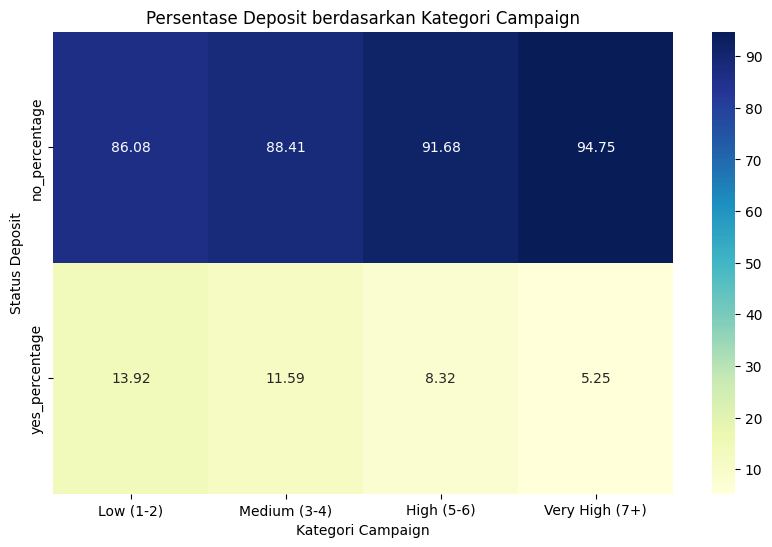

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan batas binning untuk campaign
bins_campaign = [0, 2, 4, 6, float('inf')]
labels_campaign = ['Low (1-2)', 'Medium (3-4)', 'High (5-6)', 'Very High (7+)']

# Tambahkan kolom 'campaign_binned'
df['campaign_binned'] = pd.cut(df['campaign'], bins=bins_campaign, labels=labels_campaign)

# Hitung jumlah dan persentase berdasarkan kategori campaign dan status deposit
campaign_counts = df.groupby(['campaign_binned', 'y']).size().unstack(fill_value=0)
campaign_counts['Total'] = campaign_counts.sum(axis=1)
campaign_counts['no_percentage'] = (campaign_counts['no'] / campaign_counts['Total']) * 100
campaign_counts['yes_percentage'] = (campaign_counts['yes'] / campaign_counts['Total']) * 100

# Buat heatmap untuk campaign
plt.figure(figsize=(10, 6))
sns.heatmap(campaign_counts[['no_percentage', 'yes_percentage']].T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Persentase Deposit berdasarkan Kategori Campaign')
plt.xlabel('Kategori Campaign')
plt.ylabel('Status Deposit')
plt.show()


**Penjelasan**

Analisis terhadap data jumlah kontak (*campaign*) yang dilakukan menunjukkan bahwa ada kecenderungan bahwa lebih banyak kontak dapat mempengaruhi peluang deposit. Namun, pola ini memiliki batasan yang penting untuk dipahami:

1. **Kenaikan Kontak Hingga Titik Tertentu:**
   - Meskipun pada awalnya ada peningkatan peluang deposit dengan jumlah kontak yang lebih tinggi, setelah mencapai sekitar 5 kontak, data menunjukkan bahwa tambahan kontak tidak lagi memberikan efek positif yang signifikan terhadap kemungkinan deposit.

2. **Dampak Kontak Berlebih:**
   - Ketika jumlah kontak melampaui batas tertentu (sekitar 7 atau lebih), efektivitas komunikasi mulai menurun. Dalam kategori *Very High* (7+ kontak), proporsi pelanggan yang melakukan deposit malah menurun secara signifikan. Ini mungkin menunjukkan bahwa jumlah kontak yang sangat tinggi dapat dianggap sebagai gangguan oleh pelanggan.

3. **Gangguan dan Persepsi Negatif:**
   - Kontak yang terlalu banyak dapat menyebabkan gangguan dan ketidaknyamanan pada pelanggan. Pelanggan yang merasa terlalu sering dihubungi mungkin merasa tertekan atau terganggu, yang dapat berdampak negatif pada persepsi mereka terhadap penawaran dan merek perusahaan. Dalam kasus ekstrem, ini bisa mengakibatkan rasa tidak puas yang mengurangi kemungkinan mereka untuk melakukan deposit.

4. **Kualitas vs. Kuantitas Kontak:**
   - Kualitas kontak juga sangat penting. Jumlah kontak yang tinggi tidak selalu berarti bahwa setiap kontak dilakukan dengan cara yang efektif atau relevan. Jika interaksi tidak disesuaikan dengan kebutuhan atau minat pelanggan, maka menambah jumlah kontak tidak akan memperbaiki hasil dan mungkin malah merugikan.



#### **Hari sejak Kontak Terakhir**

In [ ]:
import pandas as pd
from IPython.display import display

# Definisikan batas binning untuk pdays
bins = [-1, 7, 30, 998, 1000]  # -1 hingga 7 untuk kontak baru, lebih dari 30 untuk kontak lama, 999 untuk tidak pernah
labels = ['Recently Contacted (0-7 days)', 'Moderately Contacted (8-30 days)', 'Long Ago Contacted (>30 days)', 'Never Contacted']

# Tambahkan kolom baru 'pdays_binned'
df['pdays_binned'] = pd.cut(df['pdays'], bins=bins, labels=labels, right=False)

# Hitung jumlah dan persentase berdasarkan kategori 'pdays_binned' dan status deposit 'y'
def count_by_pdays_binned(df):
    counts = df.groupby(['pdays_binned', 'y'], observed=False).size().unstack(fill_value=0)
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100
    return counts.reset_index()

# Menghitung jumlah dan persentase untuk setiap kategori pdays
pdays_binned_counts = count_by_pdays_binned(df)

# Tampilkan hasil dengan display
print("Jumlah dan Persentase berdasarkan Kategori Pdays dan Status Deposit:")
display(pdays_binned_counts)


Jumlah dan Persentase berdasarkan Kategori Pdays dan Status Deposit:


y,pdays_binned,no,yes,Total,no_percentage,yes_percentage
0,Recently Contacted (0-7 days),335,642,977,34.288639,65.711361
1,Moderately Contacted (8-30 days),136,197,333,40.840841,59.159159
2,Long Ago Contacted (>30 days),0,0,0,NaN,NaN
3,Never Contacted,26149,3019,29168,89.649616,10.350384


<ipython-input-106-18ab5fbd5e5d>:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



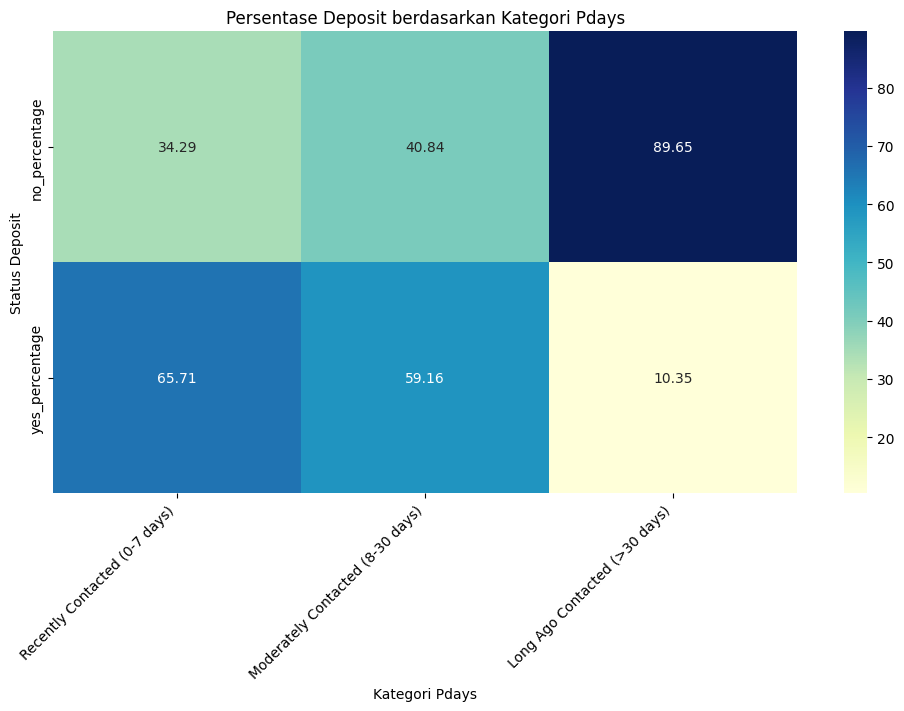

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan batas binning untuk pdays
bins_pdays = [0, 7, 30, float('inf')]
labels_pdays = ['Recently Contacted (0-7 days)', 'Moderately Contacted (8-30 days)', 'Long Ago Contacted (>30 days)']

# Tambahkan kolom 'pdays_binned'
df['pdays_binned'] = pd.cut(df['pdays'], bins=bins_pdays, labels=labels_pdays, right=False)

# Hitung jumlah dan persentase berdasarkan kategori pdays dan status deposit
pdays_counts = df.groupby(['pdays_binned', 'y']).size().unstack(fill_value=0)
pdays_counts['Total'] = pdays_counts.sum(axis=1)
pdays_counts['no_percentage'] = (pdays_counts['no'] / pdays_counts['Total']) * 100
pdays_counts['yes_percentage'] = (pdays_counts['yes'] / pdays_counts['Total']) * 100

# Buat heatmap untuk pdays
plt.figure(figsize=(12, 6))
ax = sns.heatmap(pdays_counts[['no_percentage', 'yes_percentage']].T, annot=True, cmap="YlGnBu", fmt=".2f")

# Sesuaikan label sumbu x
plt.title('Persentase Deposit berdasarkan Kategori Pdays')
plt.xlabel('Kategori Pdays')
plt.ylabel('Status Deposit')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x

plt.show()


**Penjelasan**

- **Kontak Terbaru Lebih Efektif:** Kontak yang dilakukan baru-baru ini (0-7 hari) paling efektif dalam menghasilkan deposit, menunjukkan bahwa jangkauan yang segar lebih berdampak pada keputusan pelanggan.
  
- **Efektivitas Berkurang dengan Waktu:** Semakin lama waktu berlalu sejak kontak terakhir, semakin rendah kemungkinan deposit, dengan kontak lama (>30 hari) tampaknya tidak menghasilkan hasil yang dapat diukur.

- **Kontak Awal Kritis:** Tidak melakukan kontak sebelumnya membuat peluang deposit sangat rendah, menekankan pentingnya melakukan komunikasi awal dengan pelanggan.


#### **Jumlah Kontak pada Campaign Sebelumnya**

In [ ]:
import pandas as pd
from IPython.display import display

# Definisikan batas binning untuk previous dengan mencakup nilai 0
bins = [-1, 0, 2, 4, float('inf')]  # -1 hingga 0 untuk tidak ada kontak sebelumnya, 1-2 untuk kontak sedikit, dst.
labels = ['No Previous Contact', 'Few Previous Contacts (1-2)', 'Moderate Previous Contacts (3-4)', 'Many Previous Contacts (≥5)']

# Tambahkan kolom baru 'previous_binned' ke DataFrame dengan label yang sudah diperbarui
df['previous_binned'] = pd.cut(df['previous'], bins=bins, labels=labels, right=True, include_lowest=True)

# Hitung jumlah dan persentase berdasarkan kategori 'previous_binned' dan status deposit 'y'
def count_by_previous_binned(df):
    counts = df.groupby(['previous_binned', 'y'], observed=False).size().unstack(fill_value=0)
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100
    return counts.reset_index()

# Menghitung jumlah dan persentase untuk setiap kategori previous
previous_binned_counts = count_by_previous_binned(df)

# Tampilkan hasil dengan display
print("Jumlah dan Persentase berdasarkan Kategori Previous dan Status Deposit:")
display(previous_binned_counts)


Jumlah dan Persentase berdasarkan Kategori Previous dan Status Deposit:


y,previous_binned,no,yes,Total,no_percentage,yes_percentage
0,No Previous Contact,23255,2571,25826,90.044916,9.955084
1,Few Previous Contacts (1-2),3256,1129,4385,74.253136,25.746864
2,Moderate Previous Contacts (3-4),101,145,246,41.056911,58.943089
3,Many Previous Contacts (≥5),8,13,21,38.095238,61.904762


<ipython-input-105-5f65c80c4674>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



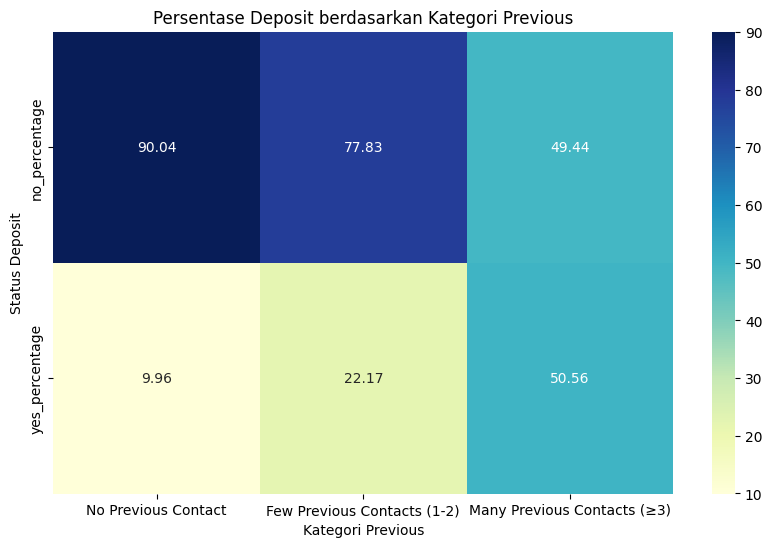

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan batas binning untuk previous
bins_previous = [0, 1, 2, float('inf')]  # Tambah batasan sesuai dengan data
# Removed one label to match the number of bins - 1
labels_previous = ['No Previous Contact', 'Few Previous Contacts (1-2)', 'Many Previous Contacts (≥3)']

# Tambahkan kolom 'previous_binned'
df['previous_binned'] = pd.cut(df['previous'], bins=bins_previous, labels=labels_previous, right=False)

# Hitung jumlah dan persentase berdasarkan kategori previous dan status deposit
previous_counts = df.groupby(['previous_binned', 'y']).size().unstack(fill_value=0)
previous_counts['Total'] = previous_counts.sum(axis=1)
previous_counts['no_percentage'] = (previous_counts['no'] / previous_counts['Total']) * 100
previous_counts['yes_percentage'] = (previous_counts['yes'] / previous_counts['Total']) * 100

# Buat heatmap untuk previous
plt.figure(figsize=(10, 6))
sns.heatmap(previous_counts[['no_percentage', 'yes_percentage']].T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Persentase Deposit berdasarkan Kategori Previous')
plt.xlabel('Kategori Previous')
plt.ylabel('Status Deposit')
plt.show()

**Penjelasan**

- **Kontak Awal Rendah Efektivitasnya:** Tidak memiliki kontak sebelumnya sangat tidak efektif dalam menghasilkan deposit. Menjalin komunikasi awal merupakan langkah krusial untuk meningkatkan peluang konversi.

- **Kontak Sedikit hingga Sedang Memperbaiki Peluang:** Jumlah kontak yang sedikit (1-2) hingga sedang (3-4) menunjukkan peningkatan peluang deposit, dengan proporsi deposit yang meningkat seiring dengan bertambahnya jumlah kontak.

- **Kontak Banyak Masih Efektif:** Meskipun jumlah kontak yang banyak (≥5) menunjukkan efektivitas dalam mendorong deposit, hal ini harus dikelola dengan hati-hati untuk menghindari kemungkinan mengganggu pelanggan.


### **Analisis Kuartal terhadap Status Deposit**

In [ ]:
import pandas as pd

# Contoh kode untuk membuat pivot table
contact_quarter_counts = df.groupby(['contact_quarter', 'y']).size().unstack(fill_value=0)
contact_quarter_counts['Total'] = contact_quarter_counts.sum(axis=1)
contact_quarter_counts['no_percentage'] = (contact_quarter_counts['no'] / contact_quarter_counts['Total']) * 100
contact_quarter_counts['yes_percentage'] = (contact_quarter_counts['yes'] / contact_quarter_counts['Total']) * 100

# Tampilkan hasil
print("Jumlah dan Persentase berdasarkan Kategori Contact Quarter dan Status Deposit:")
display(contact_quarter_counts)


Jumlah dan Persentase berdasarkan Kategori Contact Quarter dan Status Deposit:


y,no,yes,Total,no_percentage,yes_percentage
contact_quarter,,,,,
1,236,246,482,48.962656,51.037344
2,13839,1620,15459,89.520668,10.479332
3,8978,1266,10244,87.641546,12.358454
4,3567,726,4293,83.088749,16.911251


**Penjelasan**

- **Efektivitas Kontak:** Kuartal 1 dan Kuartal 4 menunjukkan hasil yang lebih baik dalam hal konversi deposit dibandingkan Kuartal 2 dan Kuartal 3. Kuartal 4, khususnya, memiliki persentase deposit yang relatif tinggi dengan jumlah kontak yang lebih moderat.
- **Perbaikan Strategi:** Kuartal 2 dan Kuartal 3 menunjukkan bahwa banyaknya kontak tidak selalu berbanding lurus dengan tingkat konversi deposit. Hal ini bisa menunjukkan bahwa mungkin ada masalah dengan strategi atau kualitas prospek pada kuartal-kuartal tersebut.
- **Rekomendasi:** Fokuskan upaya pada pendekatan yang lebih berhasil di Kuartal 1 dan Kuartal 4, dan evaluasi serta perbaiki strategi untuk Kuartal 2 dan Kuartal 3. Pertimbangkan untuk menyesuaikan strategi kontak berdasarkan waktu dan efektivitas yang telah terbukti.


### **Analisis Faktor Ekonomi Terhadap Keputusan Deposit**

#### **Analisis Pengaruh Tingkat Variasi Ketenagakerjaan terhadap Keputusan Deposit**

Jumlah dan Persentase berdasarkan Kategori Employment Variation Rate dan Status Deposit:


y,no,yes,Total,no_percentage,yes_percentage
emp.var.rate_bin,,,,,
< -2,1555,1002,2557,60.813453,39.186547
-2 - 0,9685,2083,11768,82.299456,17.700544
0 - 1.1,4780,157,4937,96.819931,3.180069
> 1.1,10600,616,11216,94.507846,5.492154


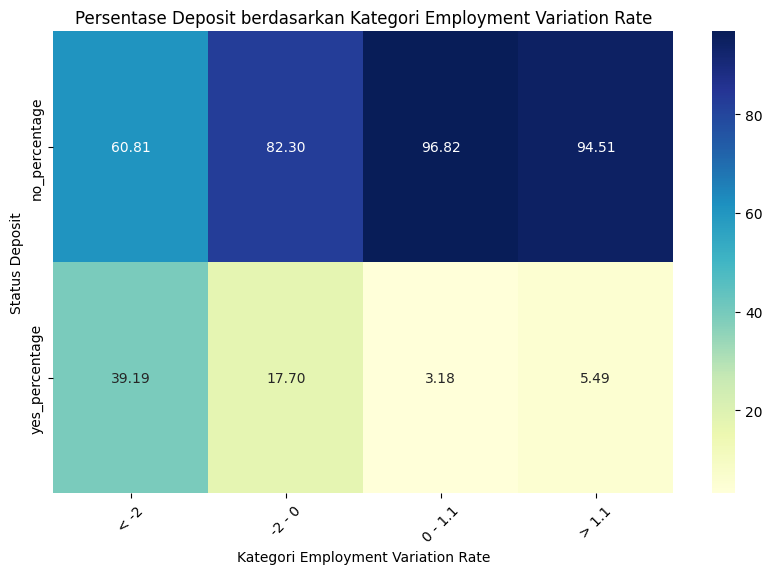

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Menonaktifkan peringatan
warnings.filterwarnings("ignore")

# Definisikan bin untuk emp.var.rate_bin dengan urutan yang benar
bins_emp_var_rate = ['< -2', '-2 - 0', '0 - 1.1', '> 1.1']
bins_emp_var_rate_sorted = sorted(bins_emp_var_rate, key=lambda x: (
    -2 if x == '< -2' else
    (0 if x == '-2 - 0' else
    (1.1 if x == '0 - 1.1' else
    float('inf')))))

# Urutkan data berdasarkan bin yang telah didefinisikan
df['emp.var.rate_bin'] = pd.Categorical(df['emp.var.rate_bin'], categories=bins_emp_var_rate_sorted, ordered=True)

# Hitung jumlah dan persentase berdasarkan kategori emp.var.rate_bin dan status deposit
emp_var_rate_counts = df.groupby(['emp.var.rate_bin', 'y']).size().unstack(fill_value=0)
emp_var_rate_counts['Total'] = emp_var_rate_counts.sum(axis=1)
emp_var_rate_counts['no_percentage'] = (emp_var_rate_counts['no'] / emp_var_rate_counts['Total']) * 100
emp_var_rate_counts['yes_percentage'] = (emp_var_rate_counts['yes'] / emp_var_rate_counts['Total']) * 100

# Tampilkan hasil
print("Jumlah dan Persentase berdasarkan Kategori Employment Variation Rate dan Status Deposit:")
display(emp_var_rate_counts)

# Buat heatmap untuk emp.var.rate_bin
plt.figure(figsize=(10, 6))
sns.heatmap(emp_var_rate_counts[['no_percentage', 'yes_percentage']].T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Persentase Deposit berdasarkan Kategori Employment Variation Rate')
plt.xlabel('Kategori Employment Variation Rate')
plt.ylabel('Status Deposit')
plt.xticks(rotation=45)  # Agar teks pada sumbu x tidak tumpang tindih
plt.show()


**Penjelasan**

**Warning:** Data menunjukkan bahwa semakin tinggi nilai negatif pada kategori variasi ketenagakerjaan, semakin tinggi persentase deposit. Mari kita analisis lebih lanjut penyebabnya, karena meskipun nilai negatif menunjukkan ketidakstabilan ekonomi, justru semakin negatif nilai tersebut, semakin tinggi persentase deposit.

**Hubungan Negatif dan Pengaruh Suku Bunga**

- **Tingkat Fluktuasi Pekerjaan yang Positif:**
  - Ketika fluktuasi pekerjaan positif (seperti dalam rentang 0 - 1.1 dan > 1.1), proporsi orang yang melakukan deposit sangat rendah. Ini mungkin karena dalam kondisi ekonomi yang lebih baik, orang lebih cenderung untuk berinvestasi, membelanjakan, atau mencari peluang lain daripada menabung.
  - Selain itu, jika suku bunga Euribor juga rendah dalam kondisi tersebut, maka insentif untuk menabung menjadi semakin kurang menarik. Dalam lingkungan suku bunga rendah, keuntungan dari menabung di deposit menjadi kecil, dan dengan stabilitas ekonomi yang lebih baik, orang mungkin memilih opsi investasi yang memberikan potensi pengembalian yang lebih tinggi.

- **Ketidakpastian Ekonomi dan Krisis:**
  - Pada periode krisis ekonomi yang parah, meskipun suku bunga rendah mungkin membuat investasi kurang menarik, ketidakpastian dan risiko tinggi dapat mengarah pada penurunan investasi secara keseluruhan. Ini diperkuat oleh penelitian yang dipublikasikan dalam artikel dengan DOI: [10.1016/S2212-5671(14)00724-2](https://doi.org/10.1016/S2212-5671(14)00724-2). Penelitian tersebut menjelaskan bagaimana ketidakpastian ekonomi dapat menghambat investasi dan mendorong tabungan sebagai tindakan berjaga-jaga.





#### **Efek Indeks Harga Konsumen Terhadap Kemungkinan Deposit**

Jumlah dan Persentase berdasarkan Kategori Consumer Price Index dan Status Deposit:


y,no,yes,Total,no_percentage,yes_percentage
cons.price.idx_bin,,,,,
92 - 93,5878,1565,7443,78.973532,21.026468
93 - 94.5,20583,2153,22736,90.530436,9.469564
94.5 - 95,159,140,299,53.177258,46.822742


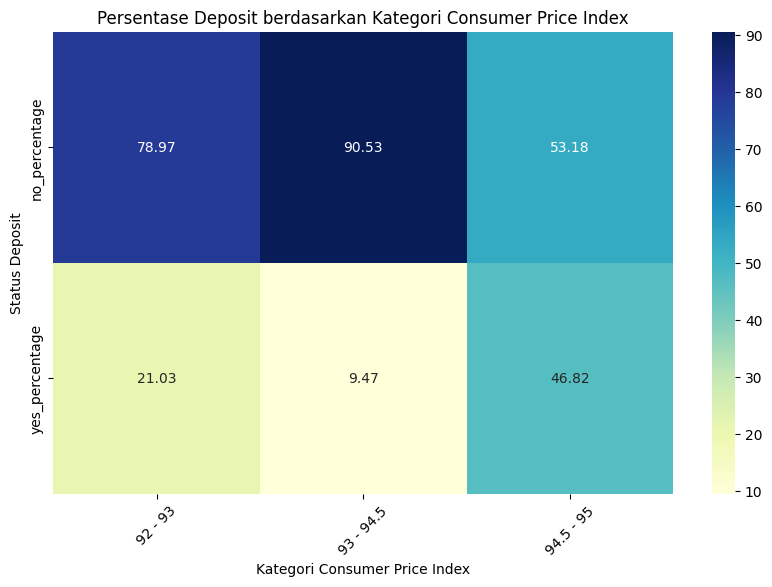

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Menonaktifkan peringatan
warnings.filterwarnings("ignore")

# Hitung jumlah dan persentase berdasarkan kategori cons.price.idx_bin dan status deposit
cons_price_idx_counts = df.groupby(['cons.price.idx_bin', 'y']).size().unstack(fill_value=0)
cons_price_idx_counts['Total'] = cons_price_idx_counts.sum(axis=1)
cons_price_idx_counts['no_percentage'] = (cons_price_idx_counts['no'] / cons_price_idx_counts['Total']) * 100
cons_price_idx_counts['yes_percentage'] = (cons_price_idx_counts['yes'] / cons_price_idx_counts['Total']) * 100

# Tampilkan hasil
print("Jumlah dan Persentase berdasarkan Kategori Consumer Price Index dan Status Deposit:")
display(cons_price_idx_counts)

# Buat heatmap untuk cons.price.idx_bin
plt.figure(figsize=(10, 6))
sns.heatmap(cons_price_idx_counts[['no_percentage', 'yes_percentage']].T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Persentase Deposit berdasarkan Kategori Consumer Price Index')
plt.xlabel('Kategori Consumer Price Index')
plt.ylabel('Status Deposit')
plt.xticks(rotation=45)  # Agar teks pada sumbu x tidak tumpang tindih
plt.show()


**Penjelasan**

- **Rentang CPI 92-93 dan 93-94.5:**
  - Ketidakpastian ekonomi global dan krisis yang berkepanjangan selama periode tersebut mendorong lebih banyak orang untuk tidak melakukan deposit. Inflasi moderat dalam rentang CPI ini tidak cukup signifikan untuk mengubah perilaku menabung secara drastis, tetapi ketidakstabilan ekonomi mendorong perilaku pengeluaran dan investasi yang berbeda.

- **Rentang CPI 94.5 - 95:**
  - Inflasi yang sangat rendah di periode ini menyebabkan lebih banyak orang memilih untuk melakukan deposit. Dalam kondisi inflasi rendah, masyarakat merasa lebih aman untuk menyimpan uang mereka sebagai langkah perlindungan terhadap ketidakpastian yang masih ada di sekitar mereka.

**Catatan Tambahan:**
- Meskipun analisis ini menunjukkan pola-pola dalam data CPI dan perilaku deposit, penting untuk dicatat bahwa hubungan antara CPI dan keputusan untuk melakukan deposit atau tidak mungkin tidak sepenuhnya signifikan atau berpengaruh pada target (deposit atau tidak). Oleh karena itu, analisis lebih lanjut melalui pemodelan machine learning dan identifikasi fitur penting dalam dataset akan diperlukan untuk menentukan pengaruh sebenarnya dari CPI terhadap keputusan deposit.


#### **Hubungan antara Indeks Kepercayaan Konsumen dan Status Deposit**

Jumlah dan Persentase berdasarkan Kategori Consumer Confidence Index dan Status Deposit:


y,no,yes,Total,no_percentage,yes_percentage
cons.conf.idx_bin,,,,,
-40 - (-30),9677,1403,11080,87.337545,12.662455
-50 - (-40),16366,2031,18397,88.960157,11.039843
-60 - (-50),203,174,377,53.846154,46.153846


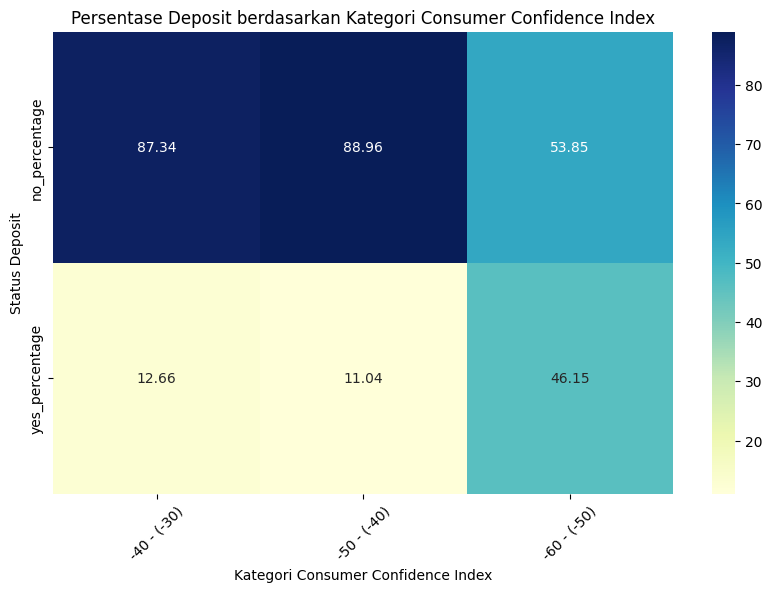

In [ ]:
# Menonaktifkan peringatan
warnings.filterwarnings("ignore")

# Hitung jumlah dan persentase berdasarkan kategori cons.conf.idx_bin dan status deposit
cons_conf_idx_counts = df.groupby(['cons.conf.idx_bin', 'y']).size().unstack(fill_value=0)
cons_conf_idx_counts['Total'] = cons_conf_idx_counts.sum(axis=1)
cons_conf_idx_counts['no_percentage'] = (cons_conf_idx_counts['no'] / cons_conf_idx_counts['Total']) * 100
cons_conf_idx_counts['yes_percentage'] = (cons_conf_idx_counts['yes'] / cons_conf_idx_counts['Total']) * 100

# Tampilkan hasil
print("Jumlah dan Persentase berdasarkan Kategori Consumer Confidence Index dan Status Deposit:")
display(cons_conf_idx_counts)

# Buat heatmap untuk cons.conf.idx_bin
plt.figure(figsize=(10, 6))
sns.heatmap(cons_conf_idx_counts[['no_percentage', 'yes_percentage']].T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Persentase Deposit berdasarkan Kategori Consumer Confidence Index')
plt.xlabel('Kategori Consumer Confidence Index')
plt.ylabel('Status Deposit')
plt.xticks(rotation=45)  # Agar teks pada sumbu x tidak tumpang tindih
plt.show()


**Penjelasan**
- **CCI yang Lebih Tinggi (Rentang -40 hingga -30):**
  - Pada rentang CCI ini, meskipun ada tingkat kepercayaan yang relatif lebih baik dibandingkan dengan rentang lainnya, proporsi orang yang melakukan deposit tetap rendah. Ini mungkin karena ketidakpastian ekonomi yang terus-menerus mendorong masyarakat untuk mencari investasi atau pengeluaran yang dianggap lebih menjanjikan dibandingkan menabung.

- **CCI yang Lebih Rendah (Rentang -50 hingga -40 dan -60 hingga -50):**
  - Pada rentang CCI yang menunjukkan tingkat kepercayaan konsumen yang lebih rendah, ada kecenderungan lebih tinggi untuk melakukan deposit. Ini mungkin mencerminkan peningkatan kekhawatiran dan ketidakpastian ekonomi yang membuat orang lebih memilih untuk menabung sebagai langkah perlindungan.

**Catatan Tambahan:**
- Walaupun ada pola yang tampak dalam data ini, perlu dicatat bahwa pengaruh CCI terhadap keputusan deposit atau tidak mungkin tidak sepenuhnya signifikan. Oleh karena itu, analisis lebih lanjut menggunakan teknik machine learning untuk mengevaluasi fitur penting dalam dataset akan diperlukan untuk memahami pengaruh sebenarnya dari CCI terhadap keputusan deposit.


#### **Pengaruh Tingkat Suku Bunga Euribor Terhadap Keputusan Deposit**

Jumlah dan Persentase berdasarkan Kategori Euribor 3 Month Rate dan Status Deposit:


y,no,yes,Total,no_percentage,yes_percentage
euribor3m_bin,,,,,
0 - 1,1867,1554,3421,54.574686,45.425314
1 - 4.5,9337,1482,10819,86.301876,13.698124
4.5 - 5,15412,818,16230,94.959951,5.040049


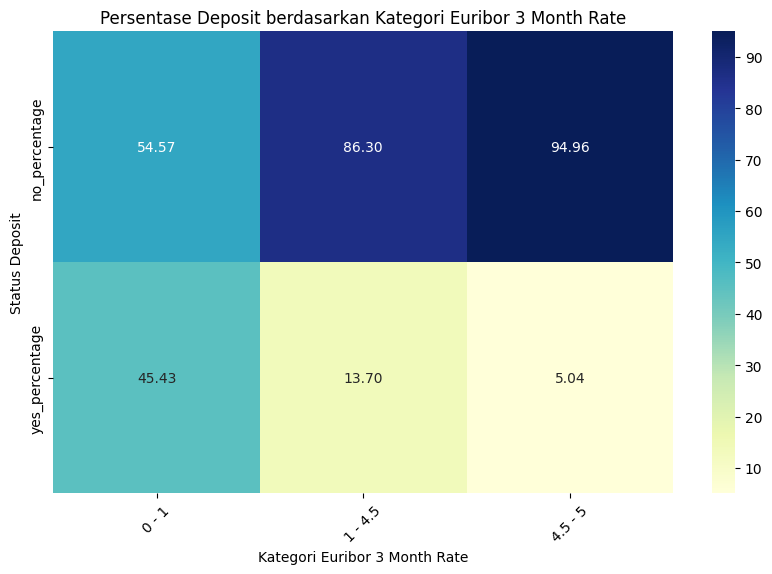

In [ ]:
# Hitung jumlah dan persentase berdasarkan kategori euribor3m_bin dan status deposit
euribor3m_counts = df.groupby(['euribor3m_bin', 'y']).size().unstack(fill_value=0)
euribor3m_counts['Total'] = euribor3m_counts.sum(axis=1)
euribor3m_counts['no_percentage'] = (euribor3m_counts['no'] / euribor3m_counts['Total']) * 100
euribor3m_counts['yes_percentage'] = (euribor3m_counts['yes'] / euribor3m_counts['Total']) * 100

# Tampilkan hasil
print("Jumlah dan Persentase berdasarkan Kategori Euribor 3 Month Rate dan Status Deposit:")
display(euribor3m_counts)

# Buat heatmap untuk euribor3m_bin
plt.figure(figsize=(10, 6))
sns.heatmap(euribor3m_counts[['no_percentage', 'yes_percentage']].T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Persentase Deposit berdasarkan Kategori Euribor 3 Month Rate')
plt.xlabel('Kategori Euribor 3 Month Rate')
plt.ylabel('Status Deposit')
plt.xticks(rotation=45)  # Agar teks pada sumbu x tidak tumpang tindih
plt.show()


**Teori**

**Suku Bunga Riil Ekuilibrium**

**Apa itu suku bunga riil ekuilibrium?**  
Suku bunga riil ekuilibrium (atau netral) adalah tingkat suku bunga yang dianggap "normal" dalam ekonomi. Ini adalah tingkat suku bunga di mana ekonomi tumbuh dengan stabil, tanpa tekanan inflasi atau deflasi. Dengan kata lain, itu adalah tingkat suku bunga yang tidak terlalu rendah sehingga mendorong inflasi, dan tidak terlalu tinggi sehingga menghambat pertumbuhan ekonomi.

**Mengapa Suku Bunga Saat Ini (2008-2010) Rendah?**

1. **Penurunan Suku Bunga Riil Ekuilibrium**:  
   - Selama krisis keuangan global dan krisis utang Eropa, suku bunga riil ekuilibrium menurun tajam. Artinya, tingkat suku bunga yang dianggap "normal" untuk pertumbuhan ekonomi yang stabil telah menurun.
   - Saat ini, suku bunga riil ekuilibrium bahkan berada di wilayah negatif di banyak negara, termasuk kawasan euro dan AS. Ini berarti tingkat suku bunga yang diperlukan untuk menjaga stabilitas ekonomi lebih rendah daripada suku bunga yang ada.

2. **Dampak dari Suku Bunga yang Terlalu Tinggi**:  
   - Jika suku bunga yang diterapkan oleh bank sentral terlalu tinggi dibandingkan dengan suku bunga riil ekuilibrium, biaya pinjaman akan terlalu tinggi.
   - Ketika biaya pinjaman terlalu tinggi, orang dan bisnis cenderung kurang berinvestasi dan berbelanja, yang dapat menyebabkan penurunan dalam ekonomi, tekanan resesi, dan deflasi (penurunan harga).

**Tantangan bagi Sektor Perbankan**

- **Suku Bunga Rendah dan Bank**:  
  - Dengan suku bunga yang rendah, bank-bank mungkin menghadapi tantangan dalam memperoleh keuntungan dari selisih antara bunga yang mereka bayar kepada deposan dan bunga yang mereka terima dari pinjaman.
  - Jika suku bunga terlalu rendah, bank-bank mungkin kesulitan untuk menyeimbangkan pendapatan mereka dengan biaya operasional, yang dapat mempengaruhi stabilitas mereka.

**Kesimpulan**

Suku bunga riil ekuilibrium adalah titik referensi penting untuk kebijakan moneter. Ketika suku bunga riil ekuilibrium menurun, bank sentral harus menyesuaikan suku bunga mereka untuk mencegah pertumbuhan ekonomi yang terlalu rendah atau inflasi yang tidak terkendali. Dalam lingkungan dengan suku bunga sangat rendah, seperti saat ini, sektor perbankan dan ekonomi secara keseluruhan menghadapi tantangan untuk menyeimbangkan pertumbuhan dan stabilitas.

**Penjelasan**

**Hubungan dan Penyebab**

- **Tingkat Suku Bunga yang Lebih Tinggi:** Ketika tingkat suku bunga Euribor 3 bulan lebih tinggi, ada kemungkinan bahwa biaya pinjaman menjadi lebih mahal dan insentif untuk melakukan deposit berkurang. Hal ini menyebabkan lebih banyak orang memilih untuk tidak melakukan deposit.

- **Tingkat Suku Bunga yang Lebih Rendah:** Ketika suku bunga lebih rendah, walaupun tidak mendorong banyak orang untuk melakukan deposit, proporsinya masih signifikan. Hal ini mungkin disebabkan oleh ketidakpastian ekonomi yang membuat orang cenderung menabung lebih banyak, meskipun suku bunga rendah.

**Kesimpulan**

Berdasarkan data ini, dapat disimpulkan bahwa ada hubungan negatif antara tingkat suku bunga Euribor 3 bulan dan kecenderungan klien untuk melakukan deposit. Semakin tinggi suku bunga, semakin rendah persentase klien yang melakukan deposit. Ini mungkin disebabkan oleh pengaruh biaya pinjaman dan peluang investasi yang lebih baik di lingkungan dengan suku bunga tinggi.

**Referensi**
- Doi :  10.1016/S2212-5671(14)00724-2
- https://id.wikipedia.org/wiki/Krisis_keuangan_Portugal_2010-2014
- https://www.investopedia.com/terms/e/european-sovereign-debt-crisis.asp
- https://www.ecb.europa.eu/press/key/date/2016/html/sp160707_1.en.html



#### **Korelasi antara Jumlah Pekerjaan dan Status Deposit**

Jumlah dan Persentase berdasarkan Kategori Number of Employees dan Status Deposit:


y,no,yes,Total,no_percentage,yes_percentage
nr.employed_bin,,,,,
5000 - 5100,7688,2259,9947,77.289635,22.710365
5100 - 5200,7703,360,8063,95.535161,4.464839
> 5200,10600,616,11216,94.507846,5.492154


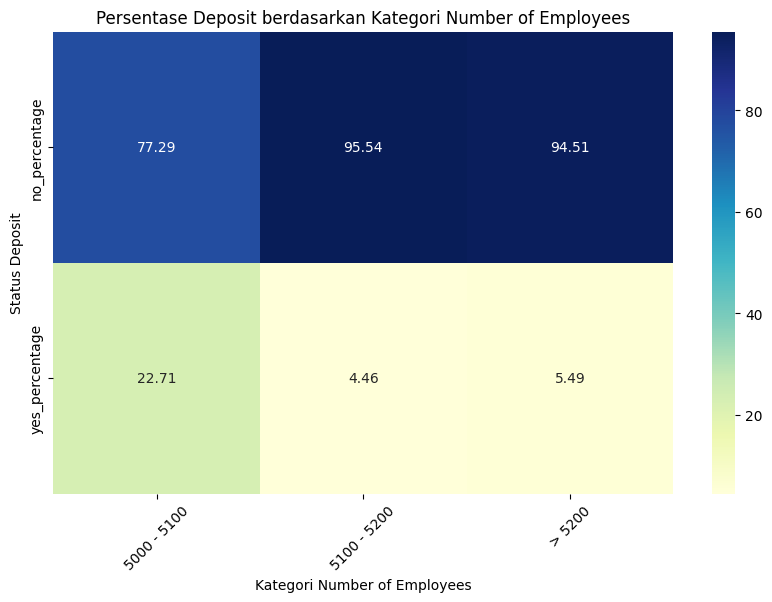

In [ ]:
# Hitung jumlah dan persentase berdasarkan kategori nr.employed_bin dan status deposit
nr_employed_counts = df.groupby(['nr.employed_bin', 'y']).size().unstack(fill_value=0)
nr_employed_counts['Total'] = nr_employed_counts.sum(axis=1)
nr_employed_counts['no_percentage'] = (nr_employed_counts['no'] / nr_employed_counts['Total']) * 100
nr_employed_counts['yes_percentage'] = (nr_employed_counts['yes'] / nr_employed_counts['Total']) * 100

# Tampilkan hasil
print("Jumlah dan Persentase berdasarkan Kategori Number of Employees dan Status Deposit:")
display(nr_employed_counts)

# Buat heatmap untuk nr.employed_bin
plt.figure(figsize=(10, 6))
sns.heatmap(nr_employed_counts[['no_percentage', 'yes_percentage']].T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Persentase Deposit berdasarkan Kategori Number of Employees')
plt.xlabel('Kategori Number of Employees')
plt.ylabel('Status Deposit')
plt.xticks(rotation=45)  # Agar teks pada sumbu x tidak tumpang tindih
plt.show()


**Penjelasan**

- **Jumlah Karyawan:**
  - Rentang jumlah karyawan yang lebih rendah memiliki proporsi deposit yang lebih tinggi, sementara jumlah karyawan yang lebih tinggi menunjukkan proporsi deposit yang lebih rendah. Ini menunjukkan bahwa dalam situasi ketidakpastian yang lebih besar atau jumlah karyawan yang lebih rendah, orang mungkin lebih cenderung untuk menabung sebagai langkah berjaga-jaga.

- **Employment Variation Rate:**
  - Ada hubungan antara perubahan dalam jumlah karyawan dan tingkat variasi pekerjaan yang menunjukkan bagaimana ketidakstabilan di pasar kerja dapat mempengaruhi keputusan untuk melakukan deposit. Dalam situasi di mana fluktuasi pekerjaan tinggi, proporsi deposit lebih tinggi, tetapi ketika fluktuasi pekerjaan berkurang, kecenderungan untuk melakukan deposit menurun.

**Catatan Tambahan:**
- Meskipun ada pola-pola yang terlihat dalam data ini, penting untuk melakukan analisis lebih lanjut menggunakan teknik machine learning untuk menentukan fitur yang paling berpengaruh terhadap keputusan deposit. Ini akan memberikan wawasan yang lebih mendalam mengenai hubungan antara variabel-variabel ini dan keputusan untuk melakukan deposit.



# **<span style='color:#E1B12D'><i> RECOMENDATION </i></span>**


- **Fokus pada kelompok Lansia**: Fokuskan penawaran produk deposit kepada kelompok lansia yang menunjukkan proporsi ketertarikan yang lebih tinggi. Dengan mengembangkan produk dan layanan yang memenuhi kebutuhan khusus mereka, menerapkan strategi pemasaran yang efektif, dan menyediakan dukungan pelanggan yang memadai, perusahaan dapat meningkatkan kepuasan pelanggan dan mendorong pertumbuhan bisnis di segmen ini. Implementasi rekomendasi ini akan membutuhkan kolaborasi antara tim pengembangan produk, pemasaran, dan layanan pelanggan untuk mencapai hasil yang optimal.

- **Kesimpulan Umum: Retired dan Student**: Kedua kelompok ini menunjukkan kecenderungan tinggi untuk memilih "yes" terlepas dari status pernikahan atau pendidikan mereka. Hal ini mungkin disebabkan oleh profil demografis dan kebutuhan spesifik mereka yang membuat mereka lebih terbuka terhadap penawaran deposit.

  - **Profil dan Kebutuhan**:
    - **Retired**: Cenderung memiliki keuangan yang stabil dan lebih fokus pada nilai jangka panjang.
    - **Student**: Terbuka terhadap penawaran baru dan solusi yang mendukung studi mereka.

- **Jika mengejar saldo yang lebih tinggi**: Fokuskan pada kategori nasabah Manajer dengan Pendidikan Tinggi. Kategori ini menunjukkan persentase "yes" yang relatif tinggi. Meskipun jumlahnya mungkin lebih kecil, potensi finansial mereka cenderung lebih besar karena pendapatan dan saldo mereka yang lebih tinggi.

- **Hindari Menawarkan Produk Deposit kepada Pelanggan dengan Status Gagal Bayar (Default)**: Pelanggan yang gagal bayar menunjukkan bahwa mereka tidak aktif dalam deposit, dan tidak ada yang memiliki deposit di kategori ini. Menawarkan produk deposit kepada pelanggan dengan status gagal bayar berisiko tinggi karena mereka mungkin menghadapi masalah finansial dan tidak dapat memenuhi komitmen deposit. Hal ini dapat mengakibatkan tingkat keberhasilan yang rendah dan potensi kerugian bagi bank.

- **Pertimbangkan Stabilitas Finansial untuk Penawaran Deposit**: Pelanggan yang memiliki housing sedikit lebih cenderung memiliki deposit dibandingkan dengan yang tidak memiliki housing. Meskipun perbedaannya tidak besar, menargetkan pelanggan dengan housing dapat sedikit meningkatkan kemungkinan keberhasilan penawaran deposit. Namun, perbedaannya tidak cukup signifikan untuk mempengaruhi strategi pemasaran secara besar-besaran.

- **Terapkan Strategi Pemasaran Seragam untuk Status Pinjaman**: Persentase deposit antara pelanggan yang memiliki pinjaman dan yang tidak memiliki pinjaman hampir sama. Oleh karena itu, tidak perlu menyesuaikan strategi pemasaran berdasarkan status pinjaman. Fokuslah pada kriteria lain yang lebih berdampak dalam menentukan potensi pelanggan untuk produk deposit.

- **Fokus pada Komunikasi melalui Cellular**: Metode komunikasi Cellular terbukti lebih efektif dalam mendapatkan persetujuan untuk produk deposit dibandingkan dengan Telephone. Karena Cellular lebih praktis dan dapat menjangkau pelanggan di mana saja, disarankan untuk memprioritaskan strategi pemasaran dan penawaran produk melalui komunikasi Cellular untuk meningkatkan tingkat keberhasilan.

- **Prioritaskan Kampanye di Bulan Maret**: Bulan Maret menunjukkan efektivitas tertinggi dalam mendorong deposit dengan persentase yes dan skor terbaik. Untuk memaksimalkan hasil, fokuskan upaya kampanye pada bulan ini. Bulan lain seperti Oktober, September, dan Desember juga menunjukkan hasil baik, sementara bulan Mei perlu strategi yang lebih agresif untuk meningkatkan efektivitas.

- **Fokuskan Kampanye pada Hari Kamis**: Kamis menunjukkan persentase deposit tertinggi dibandingkan hari lain dalam seminggu, sehingga upaya kampanye harus diprioritaskan pada hari ini. Selasa dan Rabu juga menunjukkan tingkat deposit yang tinggi, sementara Senin memiliki persentase deposit terendah. Pertimbangkan untuk menyesuaikan strategi kampanye dengan pola aktivitas konsumen selama seminggu.

- **Optimalisasi Jumlah Kontak**: Meskipun jumlah kontak awalnya meningkatkan peluang deposit, efektivitas mulai menurun setelah sekitar 5 kontak, dan sangat tinggi (7+) dapat menyebabkan penurunan proporsi deposit. Fokus pada kualitas interaksi dan batasi jumlah kontak untuk menghindari gangguan dan dampak negatif pada persepsi pelanggan.

- **Kontak Terbaru Lebih Efektif**: Kontak yang dilakukan dalam 0-7 hari terakhir paling efektif untuk mendorong deposit, dengan efektivitas menurun seiring bertambahnya waktu sejak kontak terakhir. Penting untuk melakukan kontak awal, tetapi jangan menghubungi lebih dari 5 kali untuk menghindari gangguan dan memastikan kualitas komunikasi serta pertimbangkan ketertarikan pelanggan dari kontak sebelumnya sebelum memutuskan untuk melanjutkan komunikasi.

- **Kontak Awal Penting dan Efektif**: Melakukan kontak awal sangat penting untuk meningkatkan peluang deposit. Kontak sedikit hingga sedang (1-4 kali) memperbaiki peluang deposit, sementara kontak yang banyak (≥5 kali) tetap efektif tetapi harus dikelola hati-hati untuk menghindari gangguan perhatikan ketertarikan pelanggan. Memberikan kesan pertama yang baik sangat krusial, terutama jika belum pernah menghubungi pelanggan sebelumnya.

- **Meskipun ketidakstabilan ekonomi meningkatkan kecenderungan untuk menyimpan uang dalam deposit**, pensiunan dan pelajar dapat dianggap sebagai kelompok yang lebih stabil dan cenderung menyimpan uang dalam deposit dibandingkan dengan kelompok lainnya. Bank harus memprioritaskan penawaran produk deposit kepada kategori ini, terutama selama periode ketidakstabilan ekonomi, dan memanfaatkan keinginan mereka untuk keamanan finansial. Dalam kondisi seperti ini, strategi pemasaran yang ditargetkan untuk pensiunan dan pelajar dapat membantu meningkatkan proporsi deposit, mengingat bahwa mereka cenderung lebih berfokus pada menabung untuk masa depan dan kurang terpengaruh oleh fluktuasi ekonomi jangka pendek.

- **Tingkatkan Penawaran Deposit untuk Kategori "Retired" dan "Student" pada Periode Inflasi Rendah**: Fokuskan kampanye pemasaran deposit pada pelanggan dengan status retired dan student selama periode inflasi rendah (CPI 94.5 - 95). Sesuaikan pesan kampanye untuk menekankan keamanan dan perlindungan finansial.

- **Kurangi Penawaran Deposit pada Pelanggan dengan Fluktuasi Pekerjaan Tinggi dalam Periode Ketidakstabilan Ekonomi**: Evaluasi dan kurangi penawaran produk deposit kepada pelanggan dengan fluktuasi pekerjaan tinggi selama periode inflasi moderat atau ketidakstabilan ekonomi (CPI 92-93 dan 93-94.5). Alihkan fokus pada produk yang menawarkan fleksibilitas lebih tinggi.

- **Analisis menunjukkan bahwa saat CCI lebih rendah (rentang -50 hingga -40 dan -60 hingga -50)**, pelanggan cenderung lebih banyak melakukan deposit sebagai respons terhadap ketidakpastian ekonomi. Ini karena ketidakstabilan ekonomi membuat masyarakat lebih cenderung menabung sebagai bentuk perlindungan. Sebaliknya, pada rentang CCI yang lebih tinggi (rentang -40 hingga -30), meskipun kepercayaan ekonomi relatif lebih baik, proporsi deposit tetap rendah, kemungkinan karena masyarakat lebih memilih investasi atau pengeluaran. Namun, pengaruh CCI terhadap keputusan deposit tampaknya kurang signifikan, sehingga perlu dilakukan analisis lebih lanjut untuk memahami pengaruh sebenarnya dan menyesuaikan strategi pemasaran sesuai dengan kondisi ekonomi yang berlaku.

- **Rancang produk deposit dengan fitur menarik yang mengakomodasi kebutuhan konsumen dalam kondisi ketidakpastian ekonomi**, seperti bunga fleksibel atau bonus untuk simpanan jangka panjang. Edukasi pelanggan tentang manfaat menabung dalam kondisi suku bunga rendah sebagai strategi perlindungan terhadap ketidakpastian ekonomi. Jelaskan bagaimana produk deposit dapat memberikan kestabilan finansial yang dibutuhkan selama krisis. Tekankan aspek keamanan dan perlindungan dari produk deposit untuk menarik konsumen yang mencari solusi aman di tengah ketidakpastian ekonomi.

- **Fokuskan kampanye pemasaran dan penawaran produk deposito kepada individu dengan jumlah karyawan yang lebih rendah dan di tengah fluktuasi pekerjaan yang tinggi**, dengan menekankan kestabilan dan keamanan sebagai fitur utama. Sesuaikan strategi untuk menawarkan produk dengan bunga yang menarik dan fleksibilitas tinggi.

# **<span style='color:#E1B12D'><i> LIMITATIONS </i></span>**

Berbagai pola yang ada dan teori ekonomi yang masih awam memerlukan waktu lebih lanjut untuk memahami konteks secara menyeluruh. Kompleksitas bagaimana kondisi ekonomi yang berbeda mempengaruhi perilaku deposit bisa sangat rumit, dan penelitian serta analisis yang berkelanjutan diperlukan untuk memperoleh pemahaman yang komprehensif.

# **<span style='color:#E1B12D'><i> NEXT STEP </i></span>**

Detail lebih lanjut akan muncul dari pemodelan machine learning, di mana kita juga akan menganalisis rata-rata nilai dalam konteks kondisi ekonomi untuk fitur kategori lainnya seperti pekerjaan, pendidikan, bulan, dan sebagainya. Analisis ini akan memberikan wawasan yang lebih mendalam mengenai bagaimana variabel-variabel ini mempengaruhi perilaku deposit dan membantu menyempurnakan strategi kita.